#ANALYSIS COVID-19 IN SOUTH KOREA ON *2020*

The COVID-19 pandemic demonstrates that every country remains vulnerable to public health emergencies. The aspiration towards a healthier and safer society requires that countries develop and implement a coherent and context-specific national strategy, improve governance of public health emergencies, build the capacity of their (public) health systems, minimize fragmentation, and tackle upstream structural issues, including socio-economic inequities.

The objective of this analyzing data is to analyse the variable expression of COVID-19 pandemic so that lessons can be learned towards an effective public health emergency response.

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving Case.csv to Case (1).csv
Saving PatientInfo.csv to PatientInfo (1).csv
Saving Policy.csv to Policy (1).csv
Saving Region.csv to Region (1).csv
Saving SearchTrend.csv to SearchTrend (1).csv
Saving SeoulFloating.csv to SeoulFloating (1).csv
Saving Time.csv to Time (1).csv
Saving TimeAge.csv to TimeAge (1).csv
Saving TimeGender.csv to TimeGender (1).csv
Saving TimeProvince.csv to TimeProvince (1).csv
Saving Weather.csv to Weather (1).csv


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'summerju'
os.environ['KAGGLE_KEY'] = 'dcba7a1937d63779ec6293b9c3ba98e9'

!kaggle -h

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...

optional arguments:
  -h, --help
    show this help message and exit
  -v, --version
    show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
    Use one of:
    competitions {list, files, download, submit, submissions, leaderboard}
    datasets {list, files, download, create, version, init, metadata, status}
    config {view, set, unset}
    competitions (c)
    Commands related to Kaggle competitions
    datasets (d)
    Commands related to Kaggle datasets
    kernels (k)
    Commands related to Kaggle kernels
    config
    Configuration settings


In [ ]:
ls -1ha kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d kimjihoo/coronavirusdataset

 71% 5.00M/7.00M [00:00<00:00, 45.1MB/s]
100% 7.00M/7.00M [00:00<00:00, 56.6MB/s]


In [ ]:
!unzip archive.zip


unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
import operator 
plt.style.use('Solarize_Light2')
%matplotlib inline 

# TIME ANALYSIS

In [ ]:
data_time = pd.read_csv('Time.csv')
data_time


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [ ]:
type(data_time)

pandas.core.frame.DataFrame

In [ ]:
data_time.drop('time', axis=1)


,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0
...,...,...,...,...,...,...
158,2020-06-26,1232315,1200885,12602,11172,282
159,2020-06-27,1243780,1211261,12653,11317,282
160,2020-06-28,1251695,1219975,12715,11364,282
161,2020-06-29,1259954,1228698,12757,11429,282


In [ ]:
data_time.set_index('date', inplace = True)
data_time.drop('time', axis=1)
# data_time

,test,negative,confirmed,released,deceased
date,,,,,
2020-01-20,1,0,1,0,0
2020-01-21,1,0,1,0,0
2020-01-22,4,3,1,0,0
2020-01-23,22,21,1,0,0
2020-01-24,27,25,2,0,0
...,...,...,...,...,...
2020-06-26,1232315,1200885,12602,11172,282
2020-06-27,1243780,1211261,12653,11317,282
2020-06-28,1251695,1219975,12715,11364,282


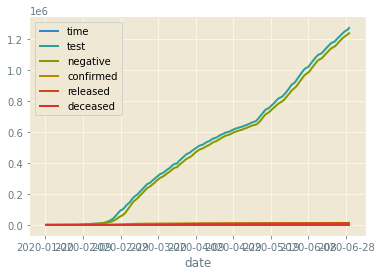

In [ ]:
data_time.plot.line()

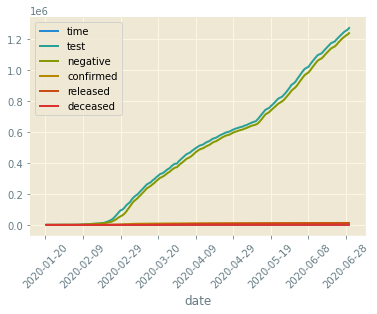

In [ ]:
data_time.plot.line(rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fecb0f22b20>,
      dtype=object)

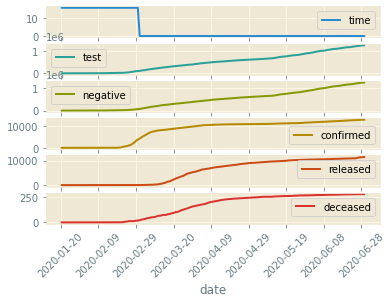

In [ ]:
data_time.plot.line(rot=45, subplots=True) #check pattern

In [ ]:
import seaborn as sns

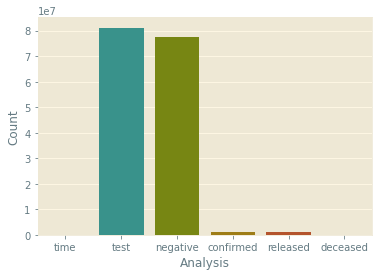

In [ ]:
Time_Stat = data_time.sum()
Time_Stat = Time_Stat.to_frame()
Time_Stat.reset_index(inplace = True) 
Time_Stat.rename(columns = {'index':'Analysis',0: 'Count'}, inplace = True)
g  = sns.barplot(x='Analysis', y='Count',data=Time_Stat)

# TIMEGENDER ANALYSIS 

In [ ]:
TimeGender = pd.read_csv('TimeGender.csv')
TimeGender['date'] = TimeGender['date'].astype('datetime64[ns]') 
TimeGender.set_index('date')



,time,sex,confirmed,deceased
date,,,,
2020-03-02,0,male,1591,13
2020-03-02,0,female,2621,9
2020-03-03,0,male,1810,16
2020-03-03,0,female,3002,12
2020-03-04,0,male,1996,20
...,...,...,...,...
2020-06-28,0,female,7265,131
2020-06-29,0,male,5470,151
2020-06-29,0,female,7287,131


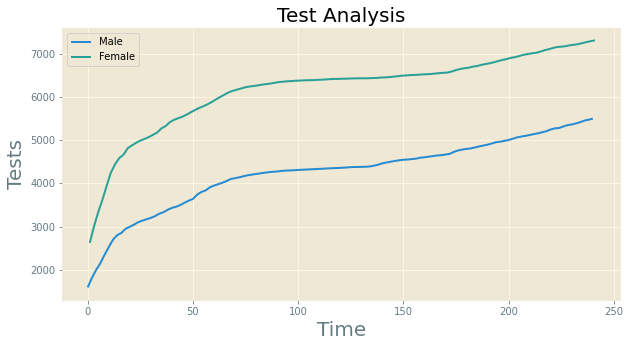

In [ ]:
plt.figure(figsize=(10, 5))
MaleCases = TimeGender[TimeGender['sex'] == 'male']
FemaleCases = TimeGender[TimeGender['sex'] == 'female']
plt.plot(MaleCases['confirmed'])
plt.plot(FemaleCases['confirmed'])
plt.title('Test Analysis', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('Tests', size=20)
plt.legend(['Male', 'Female'], prop={'size': 10})

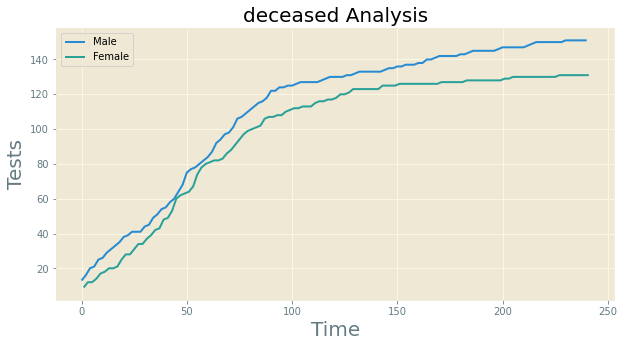

In [ ]:
plt.figure(figsize=(10, 5))
MaleCases = TimeGender[TimeGender['sex'] == 'male']
FemaleCases = TimeGender[TimeGender['sex'] == 'female']
plt.plot(MaleCases['deceased'])
plt.plot(FemaleCases['deceased'])
plt.title('deceased Analysis', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('Tests', size=20)
plt.legend(['Male', 'Female'], prop={'size': 10})

# TIMEPROVINCE ANALYSIS



In [ ]:
TimeProvince = pd.read_csv('TimeProvince.csv')

TimeProvince['date'] = TimeProvince['date'].astype('datetime64[ns]') 
TimeProvince.set_index('date')

,time,province,confirmed,released,deceased
date,,,,,
2020-01-20,16,Seoul,0,0,0
2020-01-20,16,Busan,0,0,0
2020-01-20,16,Daegu,0,0,0
2020-01-20,16,Incheon,1,0,0
2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...
2020-06-30,0,Jeollabuk-do,27,21,0
2020-06-30,0,Jeollanam-do,24,19,0
2020-06-30,0,Gyeongsangbuk-do,1389,1328,54


In [ ]:
TimeProvince_Stat = TimeProvince.groupby('date')['confirmed','deceased','released'].sum()
TimeProvince_Stat


<ipython-input-22-a11bea56b998>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TimeProvince_Stat = TimeProvince.groupby('date')['confirmed','deceased','released'].sum()


,confirmed,deceased,released
date,,,
2020-01-20,1,0,0
2020-01-21,1,0,0
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
...,...,...,...
2020-06-26,11923,282,10663
2020-06-27,11963,282,10805
2020-06-28,12009,282,10849


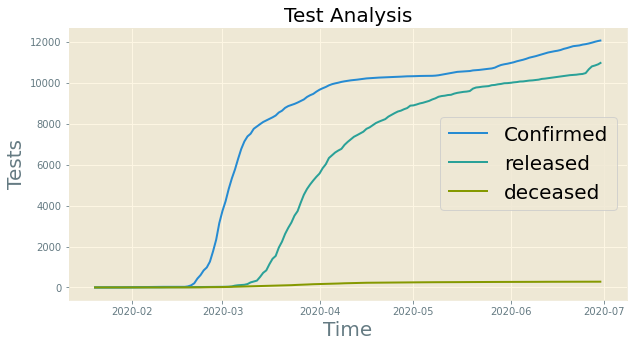

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(TimeProvince_Stat['confirmed'])
plt.plot(TimeProvince_Stat['released'])
plt.plot(TimeProvince_Stat['deceased'])
plt.title('Test Analysis', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('Tests', size=20)
plt.legend(['Confirmed', 'released','deceased'], prop={'size': 20})

In [ ]:
Province_Stat = TimeProvince.groupby('province')['confirmed','deceased','released'].max()
Province_Stat.reset_index(inplace = True) 
Province_Stat

<ipython-input-24-68b91a25affa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Province_Stat = TimeProvince.groupby('province')['confirmed','deceased','released'].max()


,province,confirmed,deceased,released
0,Busan,154,3,143
1,Chungcheongbuk-do,65,0,60
2,Chungcheongnam-do,167,0,150
3,Daegu,6906,189,6700
4,Daejeon,117,1,44
5,Gangwon-do,65,3,54
6,Gwangju,44,0,32
7,Gyeonggi-do,1207,23,931
8,Gyeongsangbuk-do,1389,54,1328
9,Gyeongsangnam-do,134,0,128


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

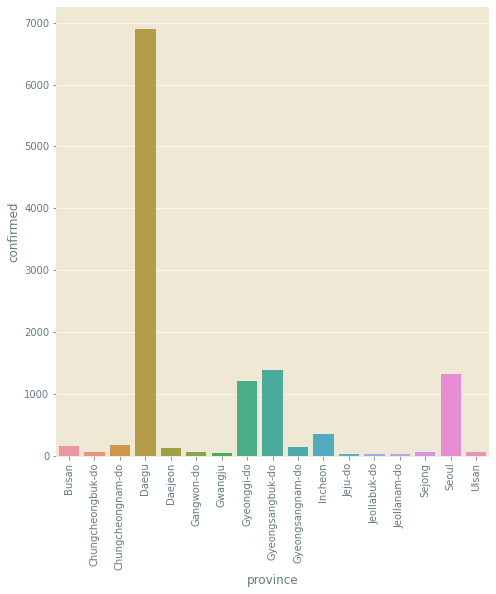

In [ ]:
g = sns.factorplot(y="confirmed",x="province",data=Province_Stat, kind="bar", size =7,height=8)
plt.xticks(rotation = 90)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

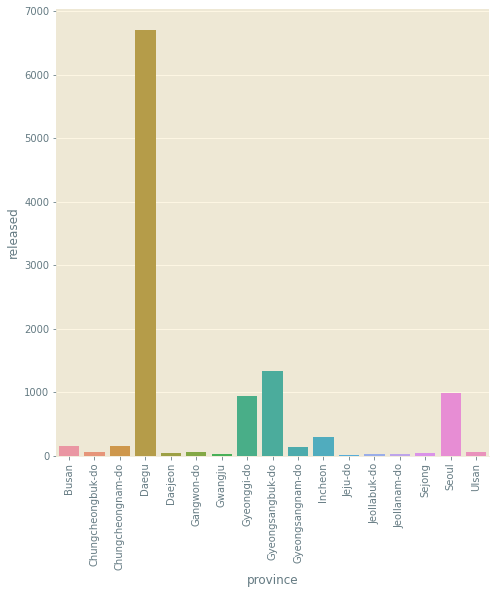

In [ ]:
g = sns.factorplot(y="released",x="province",data=Province_Stat, kind="bar", size = 7 ,height=8)
plt.xticks(rotation = 90)

# PATIENT INFO

In [ ]:
PatientInfo = pd.read_csv(r'PatientInfo.csv')
PatientInfo_Copy = PatientInfo
PatientInfo.isna().sum()


patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [ ]:
PatientInfo.columns


Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [ ]:
PatientInfo["city"] = PatientInfo["city"].fillna("Unknown")
PatientInfo["country"] = PatientInfo["country"].fillna("Unknown")
PatientInfo["contact_number"] = PatientInfo["contact_number"].fillna("0")
PatientInfo["infected_by"] = PatientInfo["infected_by"].fillna("0")
PatientInfo["deceased_date"] = PatientInfo["deceased_date"].fillna("None")
PatientInfo["released_date"] = PatientInfo["released_date"].fillna("None")
PatientInfo["symptom_onset_date"] = PatientInfo["symptom_onset_date"].fillna("None")
PatientInfo["sex"] = PatientInfo["sex"].fillna("Unknown")
PatientInfo["infection_case"] = PatientInfo["infection_case"].fillna("Others")
PatientInfo.isna().sum()

patient_id               0
sex                      0
age                   1380
country                  0
province                 0
city                     0
infection_case           0
infected_by              0
contact_number           0
symptom_onset_date       0
confirmed_date           3
released_date            0
deceased_date            0
state                    0
dtype: int64

In [ ]:
PatientInfo = PatientInfo.drop(['symptom_onset_date','released_date','deceased_date'], axis=1)

In [ ]:
PatientInfo.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'confirmed_date',
       'state'],
      dtype='object')

In [ ]:
PatientInfo["age"] = PatientInfo["age"].str.replace("s","").astype(float)


In [ ]:
#Converting certain features to categorical form
categorical_features = ['sex', 'country','province','city', 'infection_case', 'state']
PatientInfo[categorical_features] = PatientInfo[categorical_features].astype('category')
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   patient_id      5165 non-null   int64   
 1   sex             5165 non-null   category
 2   age             3785 non-null   float64 
 3   country         5165 non-null   category
 4   province        5165 non-null   category
 5   city            5165 non-null   category
 6   infection_case  5165 non-null   category
 7   infected_by     5165 non-null   object  
 8   contact_number  5165 non-null   object  
 9   confirmed_date  5162 non-null   object  
 10  state           5165 non-null   category
dtypes: category(6), float64(1), int64(1), object(3)
memory usage: 246.6+ KB


In [ ]:
#Converting certain features to Numerical form
Numerical_features = ['contact_number','infected_by']
PatientInfo[Numerical_features] = PatientInfo[Numerical_features].dtype=np.float64
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   patient_id      5165 non-null   int64   
 1   sex             5165 non-null   category
 2   age             3785 non-null   float64 
 3   country         5165 non-null   category
 4   province        5165 non-null   category
 5   city            5165 non-null   category
 6   infection_case  5165 non-null   category
 7   infected_by     5165 non-null   object  
 8   contact_number  5165 non-null   object  
 9   confirmed_date  5162 non-null   object  
 10  state           5165 non-null   category
dtypes: category(6), float64(1), int64(1), object(3)
memory usage: 246.6+ KB


In [ ]:
# Converting Date column to Date form
from datetime import datetime, timedelta
from pandas import DataFrame
PatientInfo['confirmed_date'] = PatientInfo['confirmed_date'].astype('datetime64[ns]') 

In [ ]:
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   patient_id      5165 non-null   int64         
 1   sex             5165 non-null   category      
 2   age             3785 non-null   float64       
 3   country         5165 non-null   category      
 4   province        5165 non-null   category      
 5   city            5165 non-null   category      
 6   infection_case  5165 non-null   category      
 7   infected_by     5165 non-null   object        
 8   contact_number  5165 non-null   object        
 9   confirmed_date  5162 non-null   datetime64[ns]
 10  state           5165 non-null   category      
dtypes: category(6), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 246.6+ KB


In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


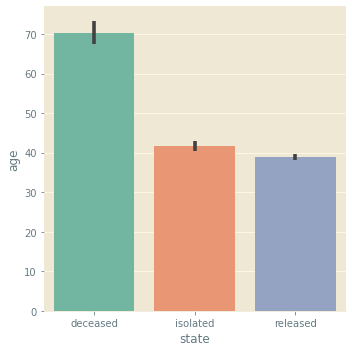

In [ ]:
g  = sns.factorplot(y="age",x="state",data=PatientInfo,kind="bar", size = 5, palette="Set2")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

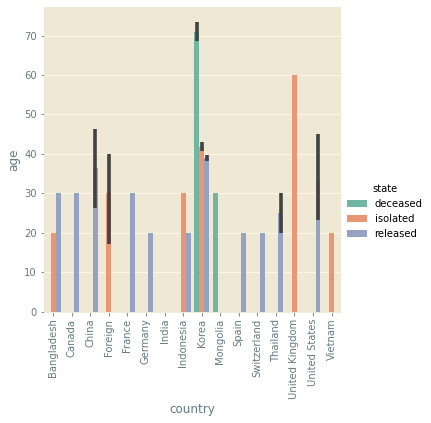

In [ ]:
# Patients State by age group and province
g  = sns.factorplot(y="age",x="country",data=PatientInfo, hue = "state", kind="bar", size = 5, height=5, palette="Set2")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

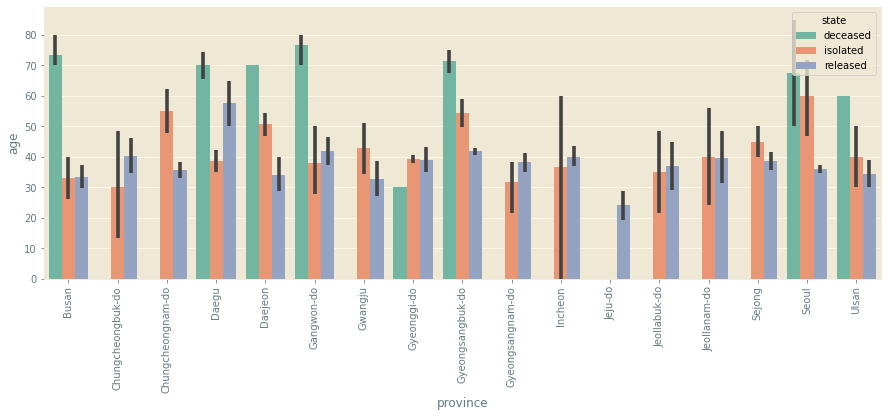

In [ ]:
#  Patients State by age group and province  
fig,axes = plt.subplots(1,1,figsize=(15,5))
g = sns.barplot(y="age",x="province",data=PatientInfo,hue = "state", palette="Set2")
plt.xticks(rotation = 90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


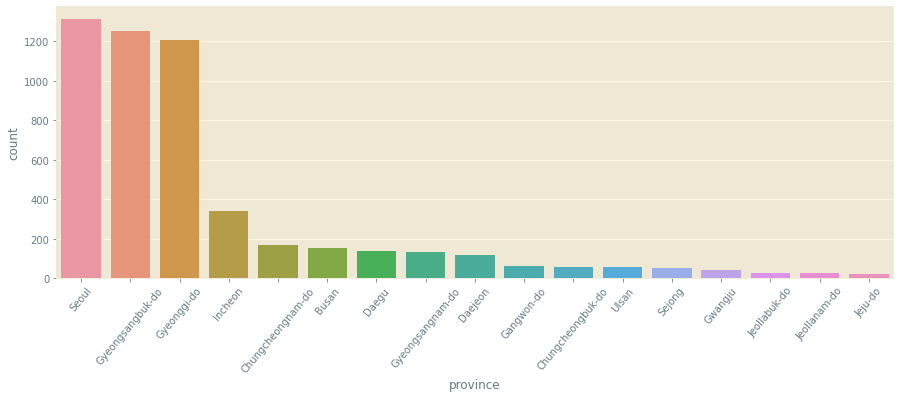

In [ ]:
# Top 20 infected province #
fig,axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(PatientInfo.province, order = PatientInfo.province.value_counts()[:20].index)
plt.xticks(rotation = 50)
plt.show()


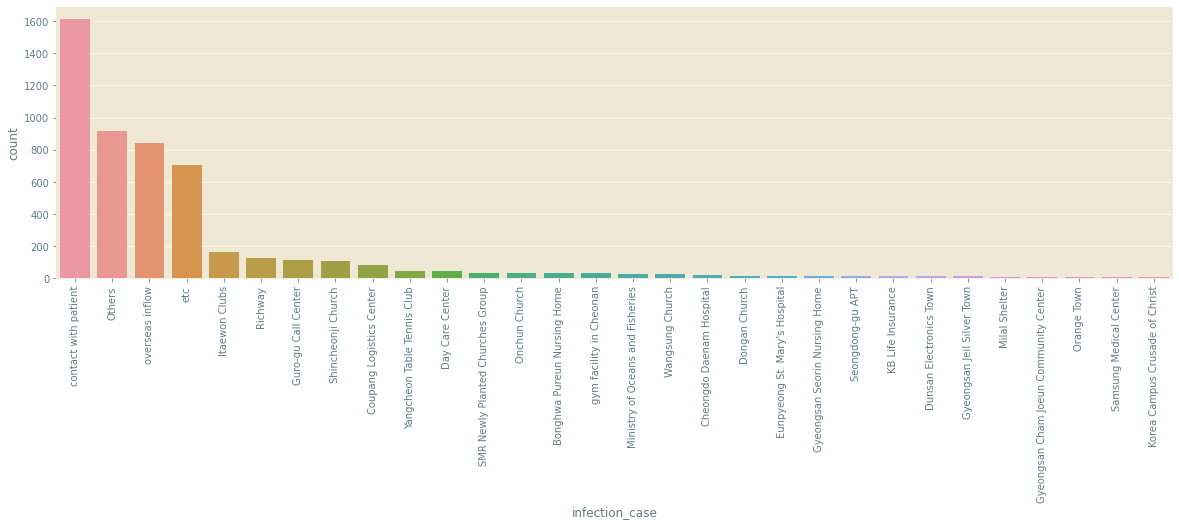

In [ ]:
# infection_case Analysis
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(PatientInfo.infection_case, order = PatientInfo.infection_case.value_counts()[:30].index)
plt.xticks(rotation = 90)
plt.show()

# DATA MERGING

In [ ]:
Weather = pd.read_csv('Weather.csv')
Weather['date'] = Weather['date'].astype('datetime64[ns]') 
Weather_2020 = Weather[(Weather['date'] > '12/31/2019')]
Weather_2020.rename(columns = {'date':'confirmed_date'}, inplace = True)
Weather_2020

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,code,province,confirmed_date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23375,10000,Seoul,2020-01-01,-2.2,-6.5,0.3,0.0,2.6,50.0,64.4
23376,11000,Busan,2020-01-01,1.9,-3.2,7.8,0.0,5.1,340.0,44.0
23377,12000,Daegu,2020-01-01,0.2,-4.9,4.6,0.0,5.6,270.0,53.3
23378,13000,Gwangju,2020-01-01,-0.3,-4.9,5.7,0.0,4.3,50.0,58.0
23379,14000,Incheon,2020-01-01,-1.4,-5.4,1.9,0.0,3.8,160.0,66.6
...,...,...,...,...,...,...,...,...,...,...
26266,50000,Jeollabuk-do,2020-06-29,22.0,19.7,26.5,27.6,4.4,90.0,85.1
26267,51000,Jeollanam-do,2020-06-29,21.9,20.0,24.0,80.5,16.8,90.0,97.9
26268,60000,Gyeongsangbuk-do,2020-06-29,20.4,17.4,24.5,43.9,4.5,160.0,90.9
26269,61000,Gyeongsangnam-do,2020-06-29,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [ ]:

Covid_2020_Details = PatientInfo.merge(Weather_2020, how='left', on=['province', 'confirmed_date'])
Covid_2020_Details


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,confirmed_date,state,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,1000000001,male,50.0,Korea,Seoul,Gangseo-gu,overseas inflow,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-01-23,released,10000.0,4.6,0.0,9.9,0.0,4.7,290.0,49.3
1,1000000002,male,30.0,Korea,Seoul,Jungnang-gu,overseas inflow,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-01-30,released,10000.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
2,1000000003,male,50.0,Korea,Seoul,Jongno-gu,contact with patient,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-01-30,released,10000.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
3,1000000004,male,20.0,Korea,Seoul,Mapo-gu,overseas inflow,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-01-30,released,10000.0,5.2,1.4,10.4,0.0,3.0,70.0,47.0
4,1000000005,female,20.0,Korea,Seoul,Seongbuk-gu,contact with patient,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-01-31,released,10000.0,3.9,1.4,8.9,0.0,4.4,270.0,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30.0,Korea,Jeju-do,Jeju-do,overseas inflow,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-05-30,released,70000.0,20.0,17.8,23.6,0.0,5.3,50.0,79.5
5161,7000000016,Unknown,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-06-16,released,70000.0,23.3,21.4,26.9,0.0,4.4,290.0,82.8
5162,7000000017,Unknown,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-06-18,isolated,70000.0,19.5,18.3,22.5,49.3,7.4,70.0,95.8
5163,7000000018,Unknown,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,<class 'numpy.float64'>,<class 'numpy.float64'>,2020-06-18,isolated,70000.0,19.5,18.3,22.5,49.3,7.4,70.0,95.8


In [ ]:
## Droping Unwanted columns 
Covid_2020_Details = Covid_2020_Details.drop(['code','infected_by','confirmed_date','contact_number','patient_id'], axis=1)

In [ ]:
Covid_2020_Details = Covid_2020_Details[(Covid_2020_Details['sex'] != 'Unknown')]
Covid_2020_Details

,sex,age,country,province,city,infection_case,state,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,male,50.0,Korea,Seoul,Gangseo-gu,overseas inflow,released,4.6,0.0,9.9,0.0,4.7,290.0,49.3
1,male,30.0,Korea,Seoul,Jungnang-gu,overseas inflow,released,5.2,1.4,10.4,0.0,3.0,70.0,47.0
2,male,50.0,Korea,Seoul,Jongno-gu,contact with patient,released,5.2,1.4,10.4,0.0,3.0,70.0,47.0
3,male,20.0,Korea,Seoul,Mapo-gu,overseas inflow,released,5.2,1.4,10.4,0.0,3.0,70.0,47.0
4,female,20.0,Korea,Seoul,Seongbuk-gu,contact with patient,released,3.9,1.4,8.9,0.0,4.4,270.0,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,male,30.0,Korea,Jeju-do,Jeju-do,contact with patient,released,12.8,10.9,16.3,0.0,4.2,270.0,49.4
5157,female,20.0,Korea,Jeju-do,Jeju-do,overseas inflow,released,12.8,10.9,16.3,0.0,4.2,270.0,49.4
5158,female,10.0,China,Jeju-do,Jeju-do,overseas inflow,released,13.2,8.3,16.6,0.0,3.6,180.0,44.1
5159,female,30.0,Korea,Jeju-do,Jeju-do,Itaewon Clubs,released,21.3,15.5,27.7,0.0,10.4,270.0,71.8


In [ ]:
#Converting certain features to categorical form
categorical_features_Covid_2020 = ['province']
Covid_2020_Details[categorical_features_Covid_2020] = Covid_2020_Details[categorical_features_Covid_2020].astype('category')
Covid_2020_Details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4043 entries, 0 to 5160
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   sex                    4043 non-null   category
 1   age                    3782 non-null   float64 
 2   country                4043 non-null   category
 3   province               4043 non-null   category
 4   city                   4043 non-null   category
 5   infection_case         4043 non-null   category
 6   state                  4043 non-null   category
 7   avg_temp               3980 non-null   float64 
 8   min_temp               3980 non-null   float64 
 9   max_temp               3980 non-null   float64 
 10  precipitation          3980 non-null   float64 
 11  max_wind_speed         3980 non-null   float64 
 12  most_wind_direction    3978 non-null   float64 
 13  avg_relative_humidity  3980 non-null   float64 
dtypes: category(6), float64(8)
memory usage:

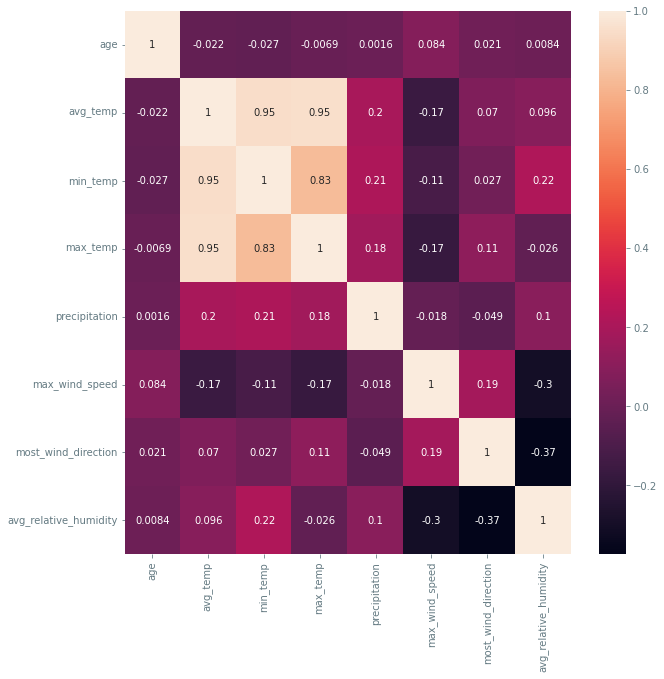

In [ ]:
plt.figure(figsize=(10,10))
g = sns.heatmap(Covid_2020_Details.corr(),annot=True)

In [ ]:
Enviroment setting / Get data

### [Environment setting]
from __future__ import print_function

## 0. Basics
import re
import math
import copy
import random
import datetime, time
from operator import add
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
from IPython.display import YouTubeVideo
# skipping cells with a long runtime, if True
fast = False
# runtime checker
start_log = datetime.now()

## 1. Data Science
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import seaborn as sns
from plotnine import *
from glob import glob
import missingno as msno
import folium
# import plotly.offline as offline
# import plotly.graph_objs as go

## 2. Statistics
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats

## 3. Forecasting
from pandas.plotting import autocorrelation_plot as acplot
from statsmodels.tsa.arima.model import ARIMA

!pip install --upgrade plotly
!pip install prophet
import prophet
# from fbprophet import Prophet
# from fbprophet.diagnostics import cross_validation
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.plot import plot_cross_validation_metric



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


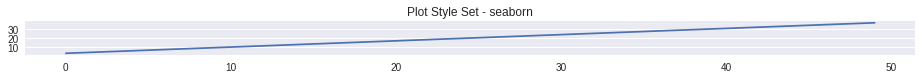

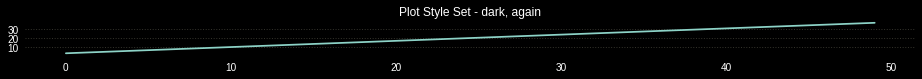

In [ ]:
### [Functions]

def get_data(path, transpose=False):
    """
    FUNCTION
        to get and check data from a file path
    @ PARAMS
        path(string) = file path for data
        transpose(bool) = transpose a wide data to show vertically / default=False
    > RETURN
        df_raw = dataframe
    """
    df_raw = pd.read_csv(path)
    print('[Sample data]')
    if transpose:
        display(df_raw.head(3).append(df_raw.tail(3)).T)
    else:
        display(df_raw.head(3).append(df_raw.tail(3)))
    return df_raw

def data_range(data, column, describe=None):
    """
    FUNCTION
        to check date range of time series or scarce chronological data
    @ PARAMS
        data(dataframe) = data to check
        column(string) = column name for date
        describe(string) = additional description on date column
                           e.g. starting_date
    > RETURN
        None
    """
    data_col = pd.to_datetime(data[column]).dt.date
    date_range = (max(data_col) - min(data_col)).days + 1
    if describe==None:
        print(f'Date range: {date_range} days')
    else:
        print(f'Date range ({describe}): {date_range} days')
    print(f'# {min(data_col)} to {max(data_col)}')
    return None


## [Refactor point] handle multiple subplots in 1 figure
def plot_groupby(data, groupby, column, title, ylabel=None, axis=None, tick_num=11):
    """
    FUCNTION
        to plot data after grouping by a column
    @ PARAMS
        data = dataframe to plot
        groupby(string) = column name for grouping
        column(string) = column name for y axis
        title(string) = plot title
        axis = specific axis to plot on
    > RETURN
        None
    """
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.title(f'{title}', fontsize=17)
    ax.set_xlabel('Date', size=13)
    if ylabel == None:
        ax.set_ylabel('Number of cases', size=13)
    else:
        ax.set_ylabel(ylabel, size=13)
    group_list = data.groupby(groupby)
    for group in group_list:
        if axis == None:
            plt.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        else:
            axis.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        """ Code Performance
        0. Without .values
            - 558 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 537 ms ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 587 ms ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
        1. With .values 
            - 508 ms ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 515 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
            - 540 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
        """
    tick_num = tick_num
    ax.set_xticks(ax.get_xticks()[::int(len(age_raw.date.unique())/tick_num)+1])
    ax.legend()
    plt.show()

 
def plot_lines(data, column_list, column_max, title):
    """
    FUCNTION
        to show many plots with combinations of lines with consistent colors and legend
        useful for plotting lines with different scales at once and then separately
    @ PARAMS
        data = dataframe to plot
        column_list = columns to have numeric values, each can be the initial column to plot up to column_max
        column_max = the last column to plot from the initial column in column_list for len(column_list)
        title(string) = plot title
    > RETURN
        None
    """
    for i in column_list:
        fig, ax = plt.subplots(figsize=(13, 7))
        plt.title(f'{title}', fontsize=17)
        color_group = color_list[:-4][-(column_max-i):]
        for test_each, color_each in zip(data.columns[i:column_max], color_group):
            plt.plot(data.date, data[test_each]
                     , label=test_each, color=color_each
                    )
            label=data[test_each]
        ax.set_xticks(ax.get_xticks()[::int(len(data.date)/8)])
        plt.xlabel('Date', size=13)
        plt.ylabel('Number of cases', size=13)
        ax.legend(loc='upper left')
        plt.show()


def split_fit_pred(X, y, model, test_size=0.3, random_state=13, classification=False):
    """
    Function
        to split data into training/test sets, fit a model, and predict with them in one-shot manner
    @params 
        X = independent variables
        y = dependent variable
        model = model to train
        test_size = size of test set / 0<s<1 / default=0.3
        random_state = random seed for stable testing results / default=13
        classification = if classification, split X with stratifying y labels / default=False(linear)
    >return
        model = a fitted model
        prediction = predictions by the model
        train_score = a score by the predictions in training
        test_score = a score by the predictions in test
    """
    # Split
    if classification == True:
        X_train, X_test, y_train, y_test = train_test_split(X, y
                                                            , stratify = y
                                                            , test_size = test_size
                                                            , random_state = random_state)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y
                                                            , test_size = test_size
                                                            , random_state = random_state)
    # Fit & validate
    model.fit(X_train, y_train)
    prediction = model.predict(X_test);
    train_score, test_score = model.score(X_train, y_train), model.score(X_test, y_test)
    return model, prediction, train_score, test_score


def test_with_range(X, y, model, size_range, random_state=13):
    """
    Function
        to test a model with various test set sizes
    @params
        X = independent variables
        y = dependent variable
        model = model to train
        size_range = the range of test sets size to experiment with / 0<s<1
        random_state = random seed for stable testing results / default=13
    @return
        train_list = list of training scores by speicifc value in the given range
        test_list = list of test scores by speicifc value in the given range
        best_test_size = the best size with the best score in test_list
    """
    plt.title(f'Score by Test Set Size (random seed={random_state})', size=17)
    train_list, test_list = list(), list()
    for s in size_range:
        model, prediction, train_score, test_score = split_fit_pred(X, y, model, random_state=random_state, test_size=s)
        train_list.append(train_score); test_list.append(test_score)
    # train_list, test_list
    plt.plot(size_range, train_list)
    plt.plot(size_range, test_list)
    plt.legend(['train_score', 'test_score'])
    plt.xlabel('Test set size')
    plt.ylabel('Score')
    plt.show()
    best_test_size = size_range[np.nanargmax(test_list)]
    print('Best train score: {} (test set size: {})'
          .format(round(np.nanmax(train_list), 2), round(size_range[np.nanargmax(train_list)], 2)))
    print('Best test score: {} (test set size: {})'
          .format(round(np.nanmax(test_list), 2), round(best_test_size, 2)))
    return train_list, test_list, best_test_size


## [Refactor point] need to be merged into test_with_range() as both share a lot except for data type
def test_with_range_ts(X, y, model, size_range, variable):
    """
    Function
        to test a model with various sizes on time series data
    @params 
        X = independent variables
        y = dependent variable
        model = model to train
        size_range = the range of test sets size to experiment with / 0<s<1
        random_state = random seed for stable testing results / default=13
    >return
        train_list = list of training scores by speicifc value in the given range
        test_list = list of test scores by speicifc value in the given range
        best_test_size = the best size with the best score in test_list
    """
    X = np.array(X).reshape(-1, 1)
    train_list, test_list, pred_list = list(), list(), list()
    for i in size_range:
        X_train, X_test, y_train, y_test = X[:-i, :], X[-i:, :], y[:-i], y[-i:]
        model.fit(X_train, y_train)
        train_pred = list(model.predict(X_train))
        test_pred = list(model.predict(X_test))
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        train_list.append(train_score)
        test_list.append(test_score)
        pred_list.append(train_pred + test_pred)
    plt.figure(figsize=(13, 7))
    plt.title(f'Score by Test Set Size (%s)'%variable, size=17)
    plt.plot(size_range/len(X), train_list)
    plt.plot(size_range/len(X), test_list)
    plt.legend(['Training score', 'Test score'])
    plt.xlabel('Test set size')
    plt.ylabel('Score')
    plt.show()
    best_score = np.nanmax(test_list)
    best_size = size_range[np.nanargmax(test_list)]
    best_pred = pred_list[np.nanargmax(test_list)]
    print(f'Best training score: %.4f (test set size=%.2f)'%(np.nanmax(train_list)
                                                          , size_range[np.nanargmax(train_list)]/len(X)))
    print(f'Best test score: %.4f (test set size=%.2f)'%(np.nanmax(test_list)
                                                       , best_size/len(X)))
    return train_list, test_list, best_pred, best_score, best_size


def get_recent_to_max(data, group='Country_Region', min_cases=1, recent_window=3, max_num=1):
    """
    FUNCTION 
        to convert raw data with cases by subregion into with that by country
        to add a column measuring which phase of spreading a country is in
            recent_to_max = n latest observation (3 latest, in case the last is 0) 
                            divided by
                            max daily case of a country
    @ PARAMS 
        data = data to convert
        group = criterion for grouping target values
        min_caes = minimum number of cases in a country to be listed /default=1
        recent_window = how many observations to apply in recent_to_max calculation / default=3
        max_num = number of max values to be averaged (1st max, 2nd max, ..., Nth max) / default=1
    > RETURN 
        rtm_df = DataFrame with columns of total_cases and recent_to_max (indexed by country)
        data_group = DataFrame grouped by group column
    """
    ## 1. Get source data by country / set dictionary to save total cases and recent_to_max
    data_group = data.groupby(group)
    total_dict, rtm_dict = dict(), dict()
    for i in data_group:
        if i[1].TargetValue.sum() > min_cases:
            total_dict[i[0]] = i[1].TargetValue.sum()
    ## 2-1. Handle 0 latest cases (for being robust to the exceptional 0 day)
            if i[1].TargetValue.max() in i[1].TargetValue[-recent_window:].values:
                rtm_dict[i[0]] = 1
            else:
    ## 2-2. Average N max values (for being robust to the errorneous max value)
                if max_num > 1:
                    temp = copy.deepcopy(i[1].TargetValue)
                    max_list = list()
                    for j in range(max_num):
                        max_list.append(max(temp))
                        temp.pop(np.argmax(temp))
                    max_val = np.mean(max_list)
                else:
                    max_val = i[1].TargetValue.max()
                rtm_dict[i[0]] = i[1].TargetValue[-recent_window:].mean() / max_val
    ## 3. Get the result dataframe
    rtm_df = pd.DataFrame(np.array([list(total_dict.values()), list(rtm_dict.values())]).T
                          , index = total_dict.keys()
                          , columns = ['total_cases', 'recent_to_max'])
    rtm_df = rtm_df.sort_values('total_cases', ascending=False)
    return rtm_df, data_group


def plot_phase(data_grouped, rtm_df, no_of_country=3, trim=False, scale=False, reverse=False):
    """
    FUNCTION 
        to plot the daily confirmed cases for each country
        to check in which phase (early, middle, late) of spreading it is
    @ PARAMS 
        group = list of time series data grouped by a column
        rtm_df = dataframe with total_cases and recent_to_max columns per country
        no_of_country = number of countries to plot
        trim = starts from the day with 1st case (than the given first)
        scale = scale target values to the max in a given period
        reverse = reverse the given order of index
    > RETURN 
        None
    """
    ## 1. Set list of countries to plot
    if reverse:
        country_list = rtm_df.index[-no_of_country:][::-1]
    else:
        country_list = rtm_df.index[0:no_of_country]
    ## 2. Plot daily cases for each country
    for i, j in zip(country_list, np.arange(1, len(country_list)+1)):
        group = data_grouped.get_group(i)
        if trim:
            # starts from the day with 1st case
            first_case_idx = int(group[group.TargetValue > 0].head(1).index.values)
        else:
            first_case_idx = 0
        group = group.loc[first_case_idx:, :] # loc than iloc
        group = group.groupby('Date').sum()
        group = group.loc[ :, ['TargetValue'] ]
        fig, ax = plt.subplots(figsize=(13, 7))
        plt.title('Daily Confirmed Cases - {0}. {1} (total cases={2}, recent to max={3})'
                  .format(j, i
                          , int(rtm_df.loc[i, "total_cases"])
                          , round(rtm_df.loc[i, "recent_to_max"], 4))
                  , size=17)
        if scale:
            group.TargetValue = group.TargetValue / max(group.TargetValue) * 100
        ax.plot(group.index
                , group.TargetValue)
        ax.set_xticks(ax.get_xticks()[::int(len(group.index)/8)])
        ax.set_xlabel('Confirmed date')
        ax.set_ylabel('Number of cases', size=13)
    return None
    
    
def arima_grid(truth, p_anchor, d_anchor, q_anchor, window):
    """
    FUNCTION
        to grid search for ARIMA model parameters (p, d, q)
    @ PARAMS
        truth = dataframe saving Date and TargetValue columns
        p_anchor, d_anchor, q_anchor = mid point for list of possible parameters
        window = range of extending anchor values (-/+ window applied to each anchor)
    > RETURN
        param_list = list of parameter sets
        mape_list = list of MAPE per each parameter sets
    """
    p_range = np.arange(max(0, p_anchor-window), p_anchor+window+1)
    d_range = np.arange(max(0, d_anchor-window), d_anchor+window+1)
    q_range = np.arange(max(0, q_anchor-window), q_anchor+window+1)
    param_list, mape_list = list(), list()
    for p in p_range:
        for d in d_range:
            for q in q_range:
                arima = ARIMA(truth.TargetValue
                              , dates=truth.Date
                              , order=(p, d, q)
                              , freq="D").fit()
                arima_pred = arima.predict()
                _, _, _, mape = diff_metrics(truth.TargetValue[:-1], arima_pred[1:])
                param_list.append(f'{p}, {d}, {q}')
                mape_list.append(mape)
    plt.plot(param_list, mape_list)
    plt.title('MAPE by parameter set (p, d, q)', size=17)
    plt.xlabel('Parameter set', size=13)
    plt.ylabel('MAPE (Mean Absolute Percentage Error)', size=13)
    plt.xticks(rotation=31)
    plt.show()
    return param_list, mape_list


def do_prophet(data, date_column, y_column
               , benchmark=None, test_size=1
               , is_bench=False, bm_name='best model at present'
               , season_mode='additive', custom_period=False, period=None, num_curve=5
               , simple=True
               ):
    """
    Function 
        to apply Prophet with default parameters
    @Params 
        data = data before being formatted in Prophet manner
        date_column = column name for time steps
        y_column = column name for independent variable
        benchmark = benchmark prediction to plot
        test_size = size for forecasting / 1<s<len(data) / default=1
        is_bench = if is_bench, plot benchmark prediction too / default=True
        bm_name = name (or description) for benchmark method
        sesson_mode = the mode for calculating seasonality / default='additive', optional='multiplicative'
        custom_period = set and use custom period
        period = custom period / format='n days(or other time unit)'
        num_curve = how many curves are allowed / default=5 / the more, the more flexible, prone to overfitting, and time need to fit
        simple = if simple, don't print out intermediate details (only plot the last prediction plot) / default=True
    >return 
        pp = the fitted Prophet model (useful for cross validation)
        predict = the predictions by the model (useful for visualization)
    """
    ## 1. Prepare a dataframe
    forecast_df = data[ [date_column, y_column] ]
    if not simple:
        print('[Raw Data - sample]')
        display(forecast_df.head(3).append(forecast_df.tail(3)))
    forecast_df = data.rename(columns = {date_column: 'ds' # ds: Date Stamp
                                         , y_column: 'y'}) # y: values to forecast
    # forecast_df.ds = pd.to_datetime(forecast_df.ds) # string to datetime
    ## 2. Split
    forecast_train, forecast_test = forecast_df.iloc[:-test_size, :], forecast_df.iloc[-test_size:, :]
    if not simple:
        print(f'Training-set size: %d\nTest-set size: %d\n'%(forecast_train.shape[0], forecast_test.shape[0]))
    ## 3. Fit
    if custom_period:
        pp = Prophet(\
                     seasonality_mode=season_mode
                     , yearly_seasonality=False
                     , weekly_seasonality=False
                     , daily_seasonality=False
                    ).add_seasonality(name='custom'
                                      , period=period
                                      , fourier_order=num_curve)
    else:
        pp = Prophet()
    pp.fit(forecast_train)
    if not simple:
        print('# Prophet model trained\n')
    ## 4. Predict
    frame = pp.make_future_dataframe(periods=test_size)
    predict = pp.predict(frame)
    if not simple:
        print('[Forecasting result - sample]')
        display(predict.tail(3).T)
        print('# yhat = predicted point value')
    ## 5. Plot predictions
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.title('Confirmed Cases Prediction (Prophet)', size=17)
    plt.plot(forecast_df.ds, forecast_df.y
             , color='#33322B', ls=':', lw=3)
    plt.plot(forecast_df.ds, predict.yhat)
    if is_bench:
        plt.plot(forecast_df.ds, benchmark)
    ax.axvline(forecast_df.ds.values[len(forecast_df)-test_size], ls=':', color='crimson')
    ax.set_xticks(ax.get_xticks()[::int(len(forecast_df.ds)/8)])
    if is_bench:
        ax.legend(['Truth'
                   , 'Prediction (Prophet)'
                   , f'Benchmark (%s)'%bm_name
                   , 'Test starts']
                  , fontsize=11
                  , loc='upper left'
                 )
    else:
        ax.legend(['Truth'
                   , 'Prediction (Prophet)'
                   , 'Test starts']
                  , fontsize=11
                  , loc='upper left'
                 )
    plt.xlabel('Confirmed date', size=13)
    plt.ylabel('Number of cases', size=13)
    plt.show()
    return pp, predict


## [Refactor point] need to embrace multi-steps forecasting
def result_df(date, truth, pred):
    """
    FUNCTION 
        to make a dataframe for test results for one-step forecasting
    @ PARAMS 
        date(string) = column name for date
        truth(numeric) = truth value
        pred(numeric) = predicted value
    > RETURN 
        result = result dataframe with 'truth, prediction, difference(truth-prediction)' as columns
    """
    col = ['truth', 'prediction', 'difference']
    result = pd.DataFrame(columns=[col], index=[date])
    result.loc[date, 'truth'] = truth
    result.loc[date, 'prediction'] = pred
    result.loc[date, 'difference'] = abs(truth-pred)
    return result


def diff_metrics(truth, pred):
    """
    FUNCTION
        to calculate difference (predictions-truth) and the performance metrics
    @ PARAMS
        truth(sequences of numeric values) = truth values
        pred(sequences of numeric values) = predicted values
    > RETURN
        diff = pred - truth
        rmse = Root Mean Sqaure Error
        mae = Mean Absolute Error
        mape = Mean Absolute Percentage Error
    """
    diff = np.array(pred) - np.array(truth)
    rmse = np.sqrt(np.mean(diff**2))
    mae = np.mean(np.abs(diff))
    mape = np.mean(np.abs(diff) / (np.array(truth) + 1))
    return diff, rmse, mae, mape


def perform_report(truth, pred):
    """
    FUNCTION
        to get performance report as dataframes (dependent on diff_metrics())
    @ PARAMS
        truth(sequences of numeric values) = truth values
        pred(sequences of numeric values) = predicted values
    > RETURN
        result = dataframe with columns of 'truth, prediction, difference'
        metrics = dataframe with columns of 'rmse, mae, mape'
    """
    diff, rmse, mae, mape = diff_metrics(truth, pred)
    result = pd.DataFrame(
        {'truth': truth
         , 'prediction': pred
         , 'difference': diff}
    )
    metrics = pd.DataFrame(
        {'rmse': rmse
         , 'mae': mae
         , 'mape': mape}
        , index=['score']
    )
    display(result)
    display(metrics)
    return result, metrics


def set_style():
    """
    FUNCTION
        to set color theme with a custom dark, plus additional style settings like figsize
    @ PARAMS
        None
    > RETURN
        None
    """
    plt.style.use('seaborn')
    plt.figure(figsize=(13, 1.3))
    plt.title('Plot Style Set - seaborn')
    plt.plot(np.linspace(np.pi, np.pi**np.pi))
    plt.show()
    plt.style.use('dark_background')
    plt.rcParams['axes.grid.axis'] = 'y'
    plt.rcParams['grid.linestyle'] = ':'
    plt.rcParams['grid.color'] = '#33322B'
    plt.rcParams['figure.autolayout'] = True
    plt.rcParams['figure.figsize'] = (13, 7)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 13})
    plt.figure(figsize=(13, 1.3))
    plt.title('Plot Style Set - dark, again')
    plt.plot(np.linspace(np.pi, np.pi**np.pi))
    plt.show()
    
set_style()

In [ ]:
## 1. Get data on global confirmed cases and fatalities (which are more recent than test_raw)
test_global = pd.read_csv('train.csv')
## 2. Pick relevant rows and columns
daily_korea_raw = [0, 0, 0]
daily_korea_raw = test_global[ (test_global.Country_Region=='Korea, South') 
                              & (test_global.Target=='ConfirmedCases') 
                              & (test_global.Date>='2020-01-20') 
                             ].loc[ :, ['Date', 'TargetValue'] ]

In [ ]:
## 1. Get data on search trends
search_korea_raw = pd.read_csv('search_southkorea.csv')
## 2. Cleanse nulls and insignificant values
search_korea_raw = search_korea_raw.dropna()
search_korea_raw = search_korea_raw.replace('<1', 0) # <1 means less than 1 significance in raw data
## 3. Convert object to float
search_korea_raw.iloc[:, 1:-2] = search_korea_raw.iloc[:, 1:-2].astype(float)
## 4. Make a new column by merging 5 sub-columns for COVID-19 search on google
search_korea_raw['google(all)'] = search_korea_raw.iloc[:, 1:-1].sum(axis=1)
search_korea_raw['google(all)'] = search_korea_raw['google(all)']/max(search_korea_raw['google(all)']) * 100 # normalizing

## 5. Match lengths between search & case datasets
if len(search_korea_raw) < len(daily_korea_raw):
    daily_korea = daily_korea_raw[:len(search_korea_raw)]
    search_korea = search_korea_raw[3:]
else:
    daily_korea = daily_korea_raw
    search_korea = search_korea_raw[3:3+len(daily_korea)]
daily_korea.index = range(len(daily_korea))
search_korea.index = range(len(search_korea))
print('[Sample data]')
display(search_korea.head(3).append(search_korea.tail(3)))
# 6. Get X, y
shorter_len = min(len(search_korea), len(daily_korea))
X_google = search_korea['google(all)'][:shorter_len]
X_naver = search_korea['naver(all)'][:shorter_len]
y = daily_korea.TargetValue.values[:shorter_len]
date_range = daily_korea.Date[:shorter_len]
# X_google, X_naver, y = np.log(X_google+1), np.log(X_naver+1), np.log(y+1) # log version

[Sample data]


,Day,corona,corona virus,covid,covid19,corona(Kor),naver(all),google(all)
0,2020-01-23,1.0,1.0,0.0,0.0,4.0,0.97466,5.084746
1,2020-01-24,1.0,2.0,0.0,0.0,6.0,1.51068,7.627119
2,2020-01-25,1.0,3.0,0.0,0.0,8.0,1.35777,10.169492
132,2020-06-03,1.0,0.0,1.0,0.0,14.0,8.43412,13.559322
133,2020-06-04,1.0,0.0,1.0,0.0,13.0,7.72815,12.711864
134,2020-06-05,1.0,0.0,1.0,0.0,12.0,7.34759,11.864407


Data Description

1. Daily search trends since the day with the first confirmed case in S.Korea
2. Google offers the trend of an individual word, so we use 5 columns for 5 search queries related to COVID-19
    - we merge them into one column (relative significances among words applied)
        - 'corona' + 'corona virus' + 'covid' + 'covid19' + 'corona(Kor)' = 'google(all)'
3. Naver gives the cumulative result on up to 20 words for 1 search topic
    - Now we gather a new search trends data from Naver for the same date range as Google's
        - to account the relative interests only after the first case (not after 2016-01-01 as in search_raw)

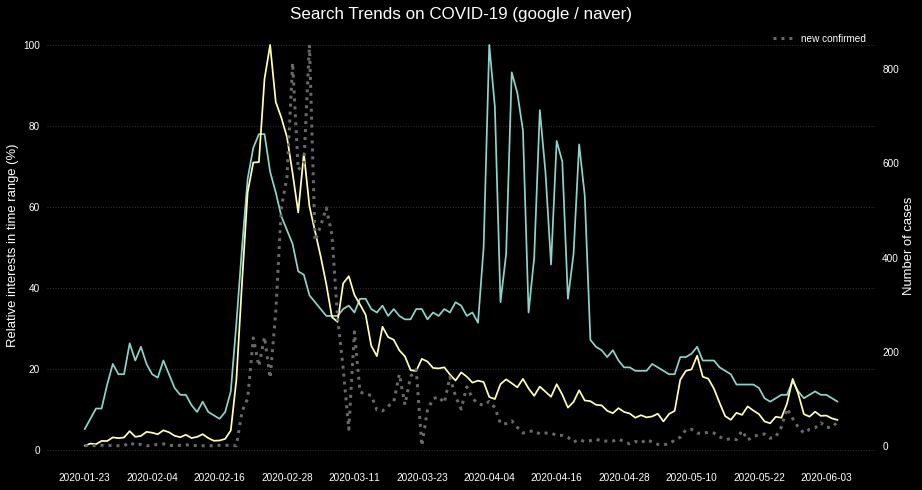

In [ ]:
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('Search Trends on COVID-19 (google / naver)', size=17)

ax1.plot(date_range, X_google)
ax1.plot(date_range, X_naver)
ax1.set_xticks(ax1.get_xticks()[::int(len(date_range)/11)])
ax1.set_ylabel('Relative interests in time range (%)', size=13)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel("Number of cases", size=13)
ax2.plot(date_range, y
         , label='new confirmed'
         , color='dimgray'
         , ls=':'
         , lw=3)
ax2.set_xticks(ax2.get_xticks()[::int(len(date_range)/11)])
ax2.legend(loc='upper right')

plt.show()

Snap Analysis - Google search trends on COVID-19

1. Naver trends have a lot more similar pattern to daily confirmed cases than Google's
2. Google trends show some random fluctuation for the first 3 weeks in April
    1) This mainly came from the query of corona in Korean
    2) It seems unreasonable that there were more interests 1 month after the peak of confirmed cases than at the peak
    3) There might be systematic errors or causes to raise the frequency of queries for this period
3. By its similarity, Naver trends are expected to be more useful for forecasting the confirmed cases
Let's experiment with a linear regression model first



*Linear* Relationships / residuals after excluding linearity



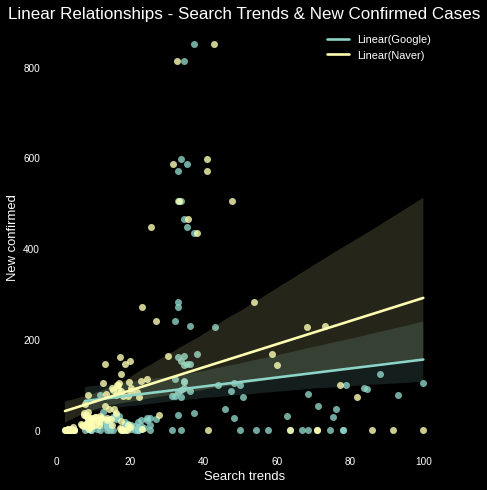

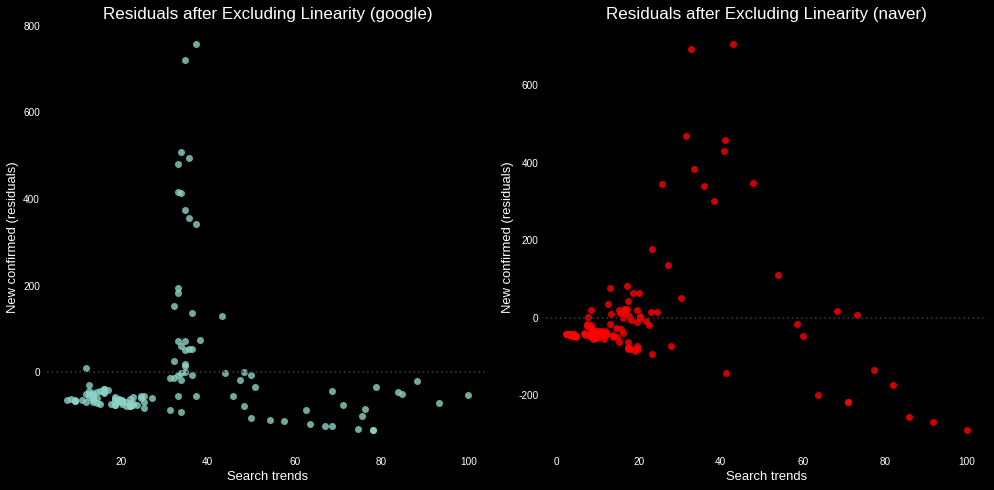

In [ ]:
## 1. Linear relationship
# 1) Get time-gaps between search trends and confirmed cases empirically 
gap_google = np.argmax(y) - np.argmax(X_google[:50])
gap_naver = np.argmax(y) - np.argmax(X_naver)
# 2) Plot regressions on scatter points
plt.figure(figsize=(7, 7))
plt.title('Linear Relationships - Search Trends & New Confirmed Cases', size=17)
plt.grid(False)
sns.regplot(X_google[gap_google:len(X_google)]
           , y[:len(X_google)-gap_google])
sns.regplot(X_naver[gap_naver:len(X_naver)]
           , y[:len(X_naver)-gap_naver])
plt.xlabel('Search trends', size=13)
plt.ylabel('New confirmed', size=13)
plt.legend(['Linear(Google)', 'Linear(Naver)'
           ], fontsize=11)
plt.show()

## 2. Residuals - Google
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
axes[0].set_title('Residuals after Excluding Linearity (google)', size=17)
sns.residplot(X_google[gap_google:len(X_google)]
              , y[:len(X_google)-gap_google]
              , ax=axes[0])
axes[0].grid(False)
axes[0].set_xlabel('Search trends', size=13)
axes[0].set_ylabel('New confirmed (residuals)', size=13)
# plt.show()

## 3. Residuals - Naver
plt.title('Residuals after Excluding Linearity (naver)', size=17)
sns.residplot(X_naver[gap_naver:len(X_naver)]
              , y[:len(X_naver)-gap_naver]
              , color='Red'
              , ax=axes[1])
axes[1].grid(False)
axes[1].set_xlabel('Search trends', size=13)
axes[1].set_ylabel('New confirmed (residuals)', size=13)
plt.show()

Snap Analysis - linear relationships / residuals

1. Naver trends show a stronger positive linearity than Google trends as expected by the similarity of shapes
    - but this result is not definitive since we applied the time gap between the peaks of two graphs for overlapping them better
2. Both residual plots seem not random (thus not stationary) yet
    - which means a simple linearity can't explain the relationship of search trends and confirmed cases solely
3. We better run the actual model to check if the search trends have any (limited) potential to predict infections

Linear Regression



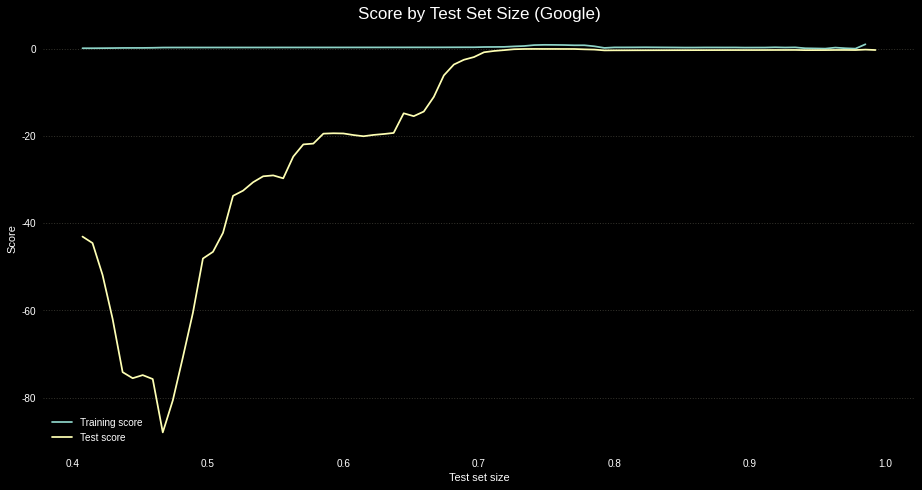

Best training score: 1.0000 (test set size=0.99)
Best test score: -0.0650 (test set size=0.74)


In [ ]:
size_range = np.arange(55, len(y))
_, _, pred_g, best_score_g, best_size_g = test_with_range_ts(X_google, y, LinearRegression(), size_range, 'Google');

R2 score on linear regression (applied above and below)

1. Equation
    R2 = 1 - ( ((truth - prediction)**2).sum() / ((truth - truth.mean())**2).sum() )
2. Measuring
    How similar the predictions' varaiance from truth is to that of the truth itself
3. Interpretation
    1 = best fit
    0 = irrelevant predictions
    <0 = worse than random

Result Analysis - score by test set size (Google)

1. Training score: no clear tendency of improving with more training data
    1) Which is counter-intuitivie at first (as we do expect more data drive better learning)
    2) This is related to the shape of Google trends (a rough bell shape with recent fluctuations)
    3) Only the early parts of it are similar to the truth
        - the middle and latter parts are significantly different
        - thus when the training set contains only the part before diverging, it gives the best score
2. Test score: too low to get a meaningful insight from
    1) The model learns almost nothing with any size
    2) The test score gets extremely worse when the test set size is less than 70%
    
Let's check with Naver trends

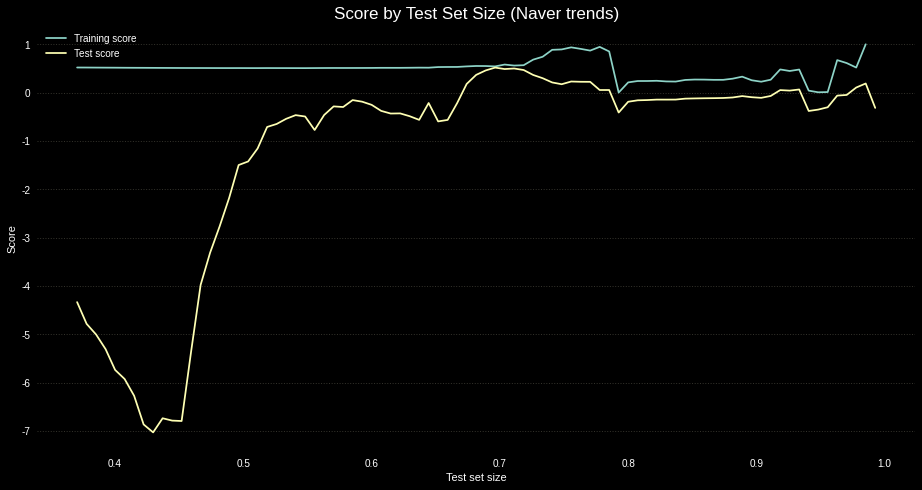

Best training score: 1.0000 (test set size=0.99)
Best test score: 0.5178 (test set size=0.70)


In [ ]:
size_range = np.arange(50, len(y))
_, _, pred_n, best_score_n, best_size_n = test_with_range_ts(X_naver, y, LinearRegression(), size_range, 'Naver trends');

Result Analysis - score by test set size (Naver trends)

1. Training score: similar pattern to that of Google trends
    1) Best score 1 comes with test set size 0.98 (same as Google)
2. Test score: far better than Google trends
    1) This is expected by the similarity of shapes
    2) The best test set size is about 70% of the data


Let's check the actual predictions with each model's best size

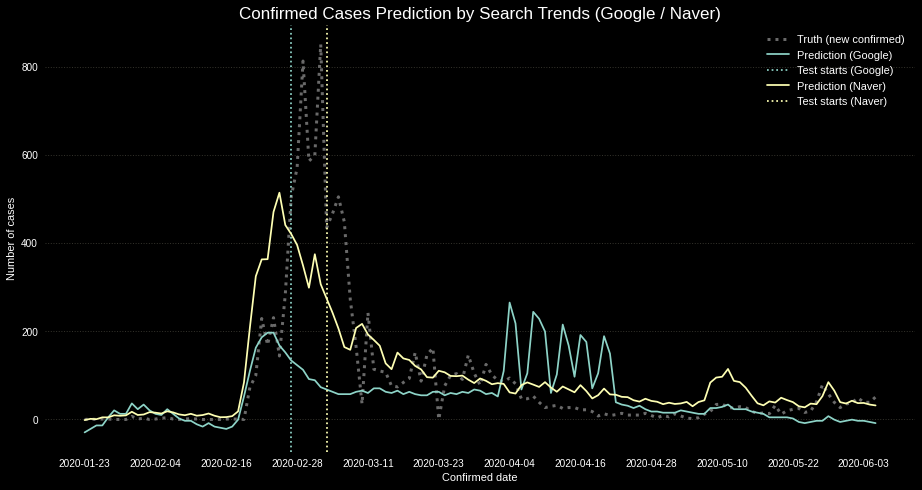

In [ ]:
test_start_g, test_start_n = len(search_korea.Day)-best_size_g, len(search_korea.Day)-best_size_n

fig, ax = plt.subplots(figsize=(13, 7))
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_g)
ax.axvline(search_korea.Day[test_start_g], ls=':', color=color_list[0])
plt.plot(search_korea.Day, pred_n)
ax.axvline(search_korea.Day[test_start_n], ls=':', color=color_list[1])
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
plt.title('Confirmed Cases Prediction by Search Trends (Google / Naver)', size=17)
ax.legend(['Truth (new confirmed)'
           , 'Prediction (Google)'
           , 'Test starts (Google)'
           , 'Prediction (Naver)'
           , 'Test starts (Naver)'
           ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

In [ ]:
print(f'[R2 score in testing]\nGoogle: %.4f\nNaver: %.4f'
      %(r2_score(y[test_start_g:], pred_g[test_start_g:])
        , r2_score(y[test_start_n:], pred_n[test_start_n:])))

[R2 score in testing]
Google: -0.0650
Naver: 0.5178


Result Analysis - predictions by search trends

1. Google trends: the recent fluctuations in search trends make the predictions irrelevant
2. Naver trends: it shows better predictions in test than training
3. Naver's accuracy heavily relies on the similar shape to the confirmed cases
    - it could be worse if the matching was broken at any point
    - we need a more robust model
Let's use both trends (even if there may be some correlation between them, do at least try)

In [ ]:
print('[Sample data] Google + Naver')
X_all = search_korea.iloc[:, -2:]
X_all.head(3).append(X_all.tail(3))

[Sample data] Google + Naver


,naver(all),google(all)
0,0.97466,5.084746
1,1.51068,7.627119
2,1.35777,10.169492
132,8.43412,13.559322
133,7.72815,12.711864
134,7.34759,11.864407


Train / test with the mean of two best sizes



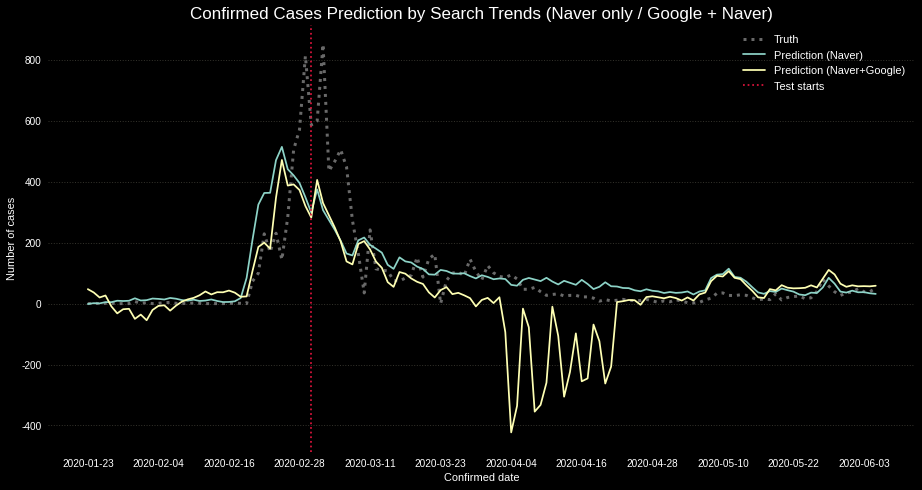

[R2 score in testing]
Naver: 0.5737
Google + Naver: -0.1189


In [ ]:
## 1. Split X into train / test sets
best_size = int((best_size_g + best_size_n)/2)
test_start = len(search_korea.Day)-best_size
X_train, y_train, X_test, y_test = X_all.iloc[:test_start, :], y[:test_start], X_all.iloc[test_start:, :], y[test_start:]

## 2. Fit / Predict
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
pred_all = np.concatenate([train_pred, test_pred])

## 3. Plot predictions / truths
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases Prediction by Search Trends (Naver only / Google + Naver)', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_n)
plt.plot(search_korea.Day, pred_all)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (Naver)'
           , 'Prediction (Naver+Google)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 4. Check scores
print(f'[R2 score in testing]\nNaver: %.4f\nGoogle + Naver: %.4f'
      %(r2_score(y[test_start:], pred_n[test_start:])
        , r2_score(y[test_start:], pred_all[test_start:])))

Result Analysis

1. The fluctuations of Google are applied reversely
2. By this effect, the model gives negative predictions
3. Negative values are not applicable to daily new confirmed cases

Let's 0-floor the predictions



# All negative predictions converted to 0
Minium value in prediction: 0.0


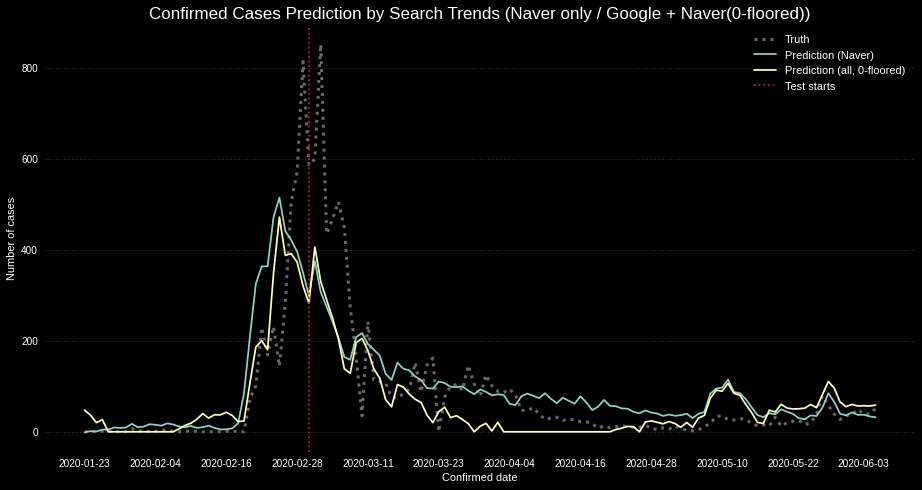

[R2 score in testing]
Naver: 0.5737
Google + Naver(0-floored): 0.5489


In [ ]:
## 1. 0-flooring negative predictions
print('# All negative predictions converted to 0')
pred_all[pred_all < 0] = 0
print('Minium value in prediction:', min(pred_all))

## 2. Plot predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases Prediction by Search Trends (Naver only / Google + Naver(0-floored))', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_n)
plt.plot(search_korea.Day, pred_all)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (Naver)'
           , 'Prediction (all, 0-floored)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 3. Check scores
print(f'[R2 score in testing]\nNaver: %.4f\nGoogle + Naver(0-floored): %.4f'
      %(r2_score(y[test_start:], pred_n[test_start:])
        , r2_score(y[test_start:], pred_all[test_start:])))

Result Analysis

1. Most predictions in testing turn into 0, with improving the score
2. But this doesn't solve the problem of poor prediction itself
3. In conclusion, Naver-only model works best on the data up to now
    - but it's not an actual forecasting yet
    - as the model relies on the given search trends in future days
    - which can't be accessible beforehand in practice (like the daily cases)
We better learn about and apply time series forecasting to use the case value itself as a training set

Time series forecasting - naive / average

1. naive: the 1 latest observed truth is the next prediction
2. average: the average of 7 latest observations is the next prediction

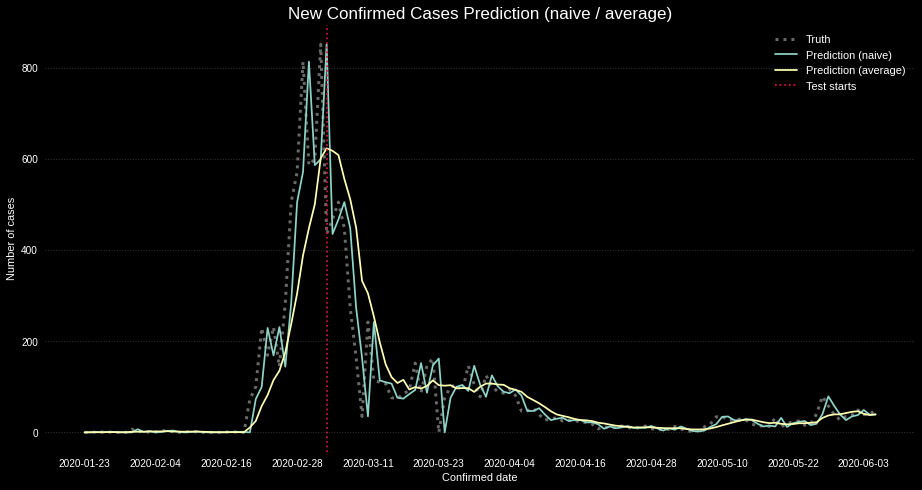

[R2 score in testing]
naive: 0.5989
average: 0.5772


In [ ]:
## 0. Reset starting point
best_size = best_size_n
test_start = len(search_korea.Day)-best_size

## 1. Naive
pred_naive = [0] # dynamic all the time
# pred_naive = list(y[:best_size_n]) + list(np.ones(len(y) - best_size_n) * y[best_size_n-1]) # static with the last observation before testing
# pred_naive = list(y[:best_size_n]) + [ y[i-1] for i in np.arange(best_size_n, len(y)) ] # dynamic in testing
[ pred_naive.append(y[i-1]) for i in np.arange(1, len(y)) ]

## 2. Moving average of (up to) 7 latest observations
avg_window = 7
pred_avg_former = [ y[0:i].mean() for i in np.arange(1, avg_window) ]
pred_avg_latter = [ y[i-avg_window:i].mean() for i in np.arange(avg_window, len(y)+1) ]
pred_avg = pred_avg_former + pred_avg_latter

## 3. Plot predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('New Confirmed Cases Prediction (naive / average)', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_naive)
plt.plot(search_korea.Day, pred_avg)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (naive)'
           , 'Prediction (average)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 4. Check scores
print(f'[R2 score in testing]\nnaive: %.4f\naverage: %.4f'
      %(
          r2_score(y[-best_size_n:], pred_naive[-best_size_n:])
        , r2_score(y[-best_size_n:], pred_avg[-best_size_n:])
       ))

Ensemble and compare models



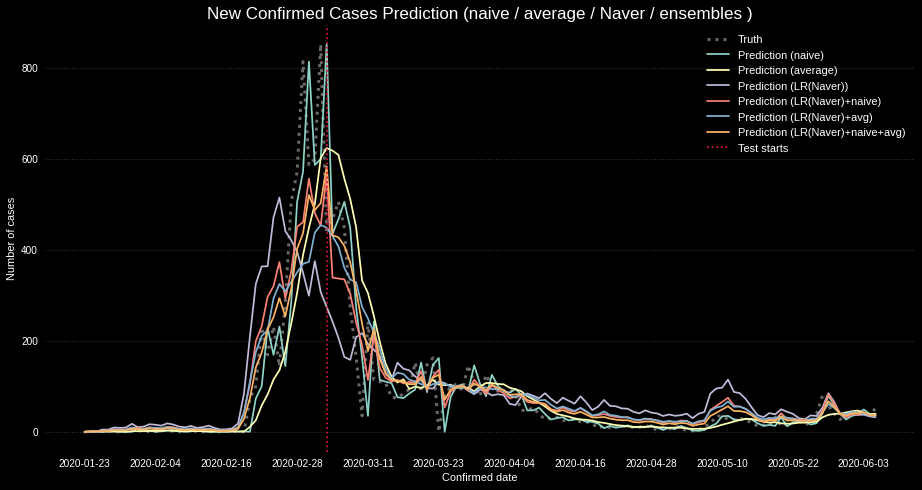

[R2 score in testing]        
Naive: 0.5989        
Average: 0.5772        
LR(Naver): 0.5178        
LR(Naver) + Naive: 0.7816        
LR(Naver) + Average: 0.7944        
LR(Naver) + Naive + Average: 0.8092


In [ ]:
## 1. Ensemble models
pred_fusion = (np.array(pred_naive) + np.array(pred_n))/2
pred_fusion_avg = (np.array(pred_avg) + np.array(pred_n))/2
pred_fusion_all = (np.array(pred_avg) + np.array(pred_naive) + np.array(pred_n))/3

## 2. Compare all predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('New Confirmed Cases Prediction (naive / average / Naver / ensembles )', size=17)
plt.plot(search_korea.Day, y, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(search_korea.Day, pred_naive)
plt.plot(search_korea.Day, pred_avg)
plt.plot(search_korea.Day, pred_n)
plt.plot(search_korea.Day, pred_fusion)
plt.plot(search_korea.Day, pred_fusion_avg)
plt.plot(search_korea.Day, pred_fusion_all)
ax.axvline(search_korea.Day[test_start], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(search_korea.Day)/11)])
ax.legend(['Truth'
           , 'Prediction (naive)'
           , 'Prediction (average)'
           , 'Prediction (LR(Naver))'
           , 'Prediction (LR(Naver)+naive)'
           , 'Prediction (LR(Naver)+avg)'
           , 'Prediction (LR(Naver)+naive+avg)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 3. Check scores
print(f'[R2 score in testing]\
        \nNaive: {round( r2_score(y[-best_size_n:], pred_naive[-best_size_n:]), 4 )}\
        \nAverage: {round( r2_score(y[-best_size_n:], pred_avg[-best_size_n:]), 4 )}\
        \nLR(Naver): {round( r2_score(y[-best_size_n:], pred_n[-best_size_n:]), 4 )}\
        \nLR(Naver) + Naive: {round( r2_score(y[-best_size_n:], pred_fusion[-best_size_n:]), 4 )}\
        \nLR(Naver) + Average: {round( r2_score(y[-best_size_n:], pred_fusion_avg[-best_size_n:]), 4 )}\
        \nLR(Naver) + Naive + Average: {round( r2_score(y[-best_size_n:], pred_fusion_all[-best_size_n:]), 4 )}')

## 4. Save the best prediction as a benchmark
bench_korea = pred_fusion_all

Result Analysis

1. Average works better than naive
2. Cause it is less sensitive to the latest change than naive
3. Linear regression model on Naver search trends shows a comparable score to average's
    - we can get a better score by ensembling both predictions 'LR(Naver) + average'
    - 'LR(Naver) + naive' also shows a performance gain but not as big as that with average
    - When we combine all of the 3, it gives a little bit better score than LR + average set

[Germany] a country with reasonably larger values of variables than S.Korea

1. Population - Germany: 83,149,300 / S.Korea: 51,780,579
2. Confirmed rate - Germany: 2,198 / S.Korea: 226 (per 1 million people)
3. Google market share - Germany: 92.86% / S.Korea: 76.52%

In [ ]:
## 1. Get data
search_germany = pd.read_csv('search_germany.csv')
## 2. Cleanse nulls and insignificant values
search_germany = search_germany.dropna()
search_germany = search_germany.replace('<1', 0) # <1 means less than 1 significance in raw data
## 3. Convert object to float
search_germany.iloc[:, 1:-2] = search_germany.iloc[:, 1:-2].astype(float)
## 4. Get a new column by merging 5 sub-columns for COVID-19 search on Google
search_germany['google(all)'] = search_germany.iloc[:, 1:-1].sum(axis=1)
search_germany['google(all)'] = search_germany['google(all)']/max(search_germany['google(all)']) * 100 # normalizing

search_all = search_germany[:len(test_raw)] # match lengths with test_raw

print('[Search Trends in Germany - sample]')
search_germany.head(3).append(search_germany.tail(3))

NameError: ignored

In [ ]:
## 1. Pick relevant rows and columns from test_global
daily_germany_raw = test_global[ (test_global.Country_Region=='Germany') 
                                & (test_global.Target=='ConfirmedCases') 
                                & (test_global.Date>='2020-01-27') 
                               ].loc[ :, ['Date', 'TargetValue'] ]
print('[Daily confirmed cases in Germany - sample]')
if len(search_germany) < len(daily_germany_raw):
    daily_germany = daily_germany_raw[:len(search_germany)]
else:
    daily_germany = daily_germany_raw
    search_germany = search_germany[:len(daily_germany)]

## 2. Check result
display(daily_germany.head(3).append(daily_germany.tail(3)))
data_range(daily_germany, 'Date')

## 3. Get X, y
X_germany, y_germany = search_germany['google(all)'], daily_germany.TargetValue.values
# X_germany, y_germany = np.log(X_germany+1), np.log(y_germany+1) # log version

[Daily confirmed cases in Germany - sample]


,Date,TargetValue
36688,2020-01-27,1
36690,2020-01-28,3
36692,2020-01-29,0
36944,2020-06-03,242
36946,2020-06-04,351
36948,2020-06-05,452


Date range: 131 days
# 2020-01-27 to 2020-06-05


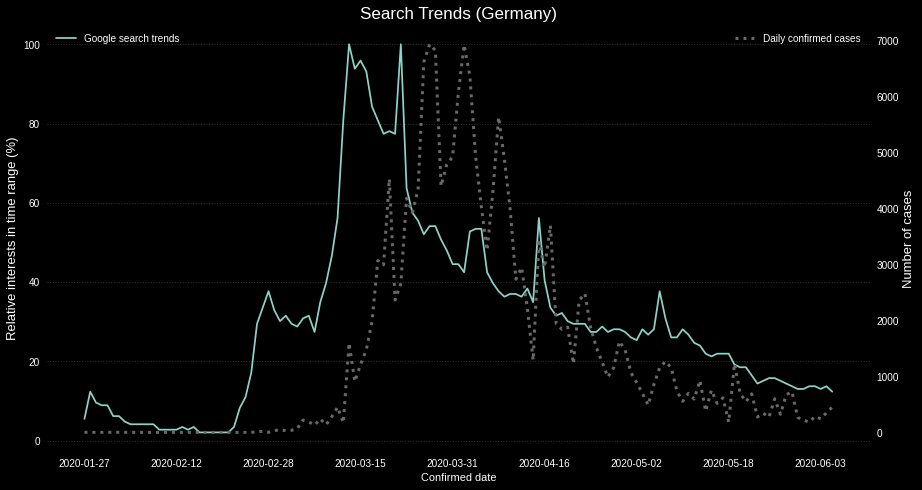

In [ ]:
fig, ax1 = plt.subplots(figsize=(13, 7))
plt.title('Search Trends (Germany)', size=17)
ax1.plot(daily_germany.Date
         , X_germany)
#          , np.log(search_germany.iloc[:,-1])+1) # log version
ax1.set_xticks(ax1.get_xticks()[::int(len(daily_germany.Date)/8)])
ax1.legend(['Google search trends']
           , loc='upper left')
ax1.set_xlabel('Confirmed date')
ax1.set_ylabel('Relative interests in time range (%)', size=13)

ax2 = ax1.twinx()
ax2.grid(False)
ax2.plot(daily_germany.Date
         , y_germany
#          , np.log(daily_germany.TargetValue+1) # log version
         , color='dimgray'
         , ls=':'
         , lw=3)         
ax2.set_xticks(ax2.get_xticks()[::int(len(daily_germany.Date)/8)])
ax2.legend(['Daily confirmed cases']
           , loc='upper right')
ax2.set_ylabel('Number of cases', size=13)
plt.show()

Snap Analysis

1. The peaks of search trends are prior to that of daily cases with about 2 weeks of interval
2. This showed in the graph for S.Korea too with a shorter interval (1 week)
3. Not only the global shape but also the small spikes have the similarity to the truth
    - e.g. around 2020-02-29, 2020-03-21, 2020-04-05

Let's apply linear regression and naive/average forecasting

Linear regression with Google search trends

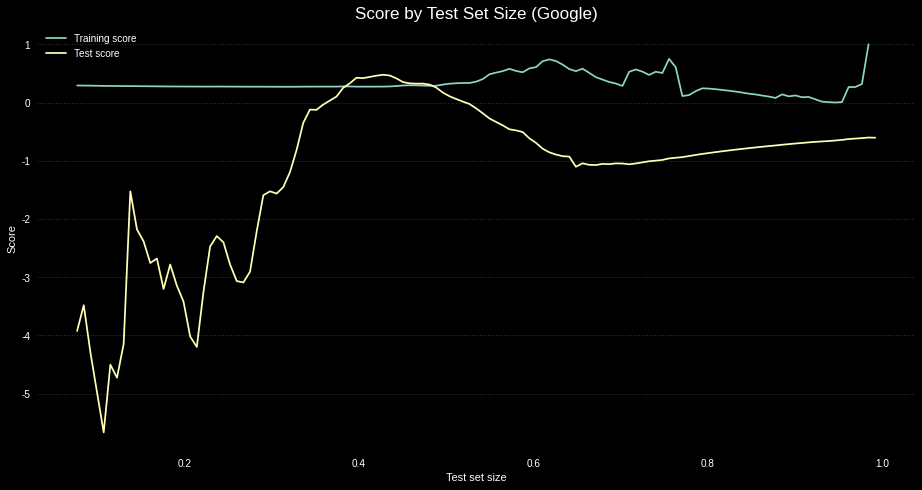

Best training score: 1.0000 (test set size=0.98)
Best test score: 0.4762 (test set size=0.43)


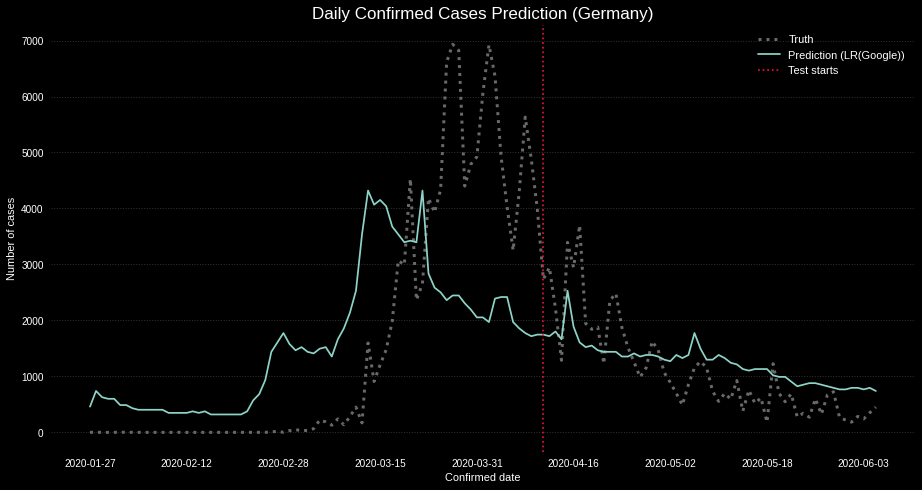

[R2 score in testing]
LR(Google): 0.4762


In [ ]:
## 1. Find the best size
size_range = np.arange(10, len(y_germany))
_, _, pred_g, best_score_g, best_size_g = test_with_range_ts(X_germany, y_germany, LinearRegression(), size_range, 'Google');

## 2. Split / fit / predict
# 1) Split
X_train, y_train, X_test, y_test = np.array(X_germany[:-best_size_g]), y_germany[:-best_size_g], np.array(X_germany[-best_size_g:]), y_germany[-best_size_g:]
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
# 2) Fit / Predict
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
pred_all = np.concatenate([train_pred, test_pred])
# 3) Plot predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Daily Confirmed Cases Prediction (Germany)', size=17)
plt.plot(daily_germany.Date, y_germany, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(daily_germany.Date, pred_all)
ax.axvline(daily_germany.Date.iloc[-best_size_g], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(daily_germany.Date)/8)])
ax.legend(['Truth'
           , 'Prediction (LR(Google))'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 3. Check score
print(f'[R2 score in testing]\nLR(Google): %.4f'
      %(
          r2_score(y_germany[-best_size_g:], pred_all[-best_size_g:])
       ))



Naive / average forecasting with daily confirmed cases



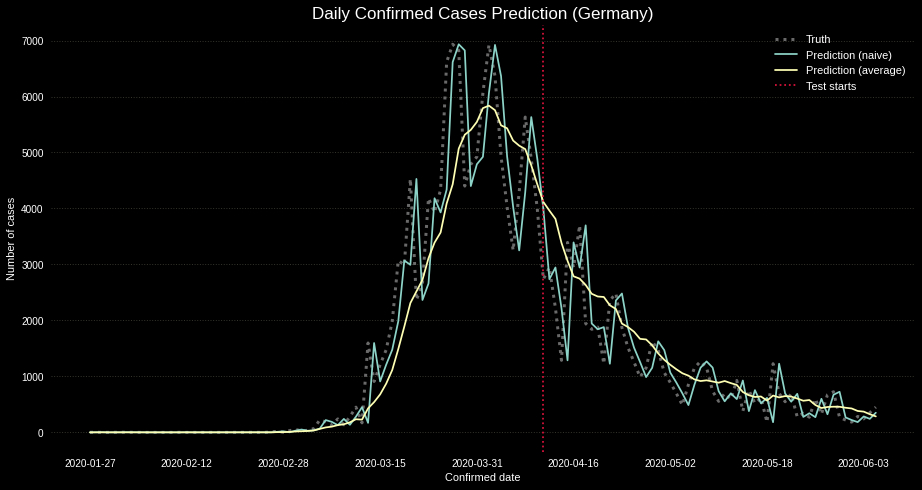

[R2 score in testing]
Naive: 0.5735
Average: 0.5854


In [ ]:
## 1. Dynamic naive
pred_naive = [0]
[ pred_naive.append(y_germany[i-1]) for i in np.arange(1, len(y_germany)) ]

## 2. Moving average of (up to) 7 latest observations
pred_avg_former = [ y_germany[0:i].mean() for i in np.arange(1, avg_window) ]
pred_avg_latter = [ y_germany[i-avg_window:i].mean() for i in np.arange(avg_window, len(y_germany)+1) ]
pred_avg = pred_avg_former + pred_avg_latter

## 3. Plot predictions
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Daily Confirmed Cases Prediction (Germany)', size=17)
plt.plot(daily_germany.Date, y_germany, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(daily_germany.Date, pred_naive)
plt.plot(daily_germany.Date, pred_avg)
ax.axvline(daily_germany.Date.iloc[-best_size_g], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(daily_germany.Date)/8)])
ax.legend(['Truth'
           , 'Prediction (naive)'
           , 'Prediction (average)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 5. Check score
print(f'[R2 score in testing]\nNaive: %.4f\nAverage: %.4f'
      %(
          r2_score(y_germany[-best_size_g:], pred_naive[-best_size_g:])
          , r2_score(y_germany[-best_size_g:], pred_avg[-best_size_g:])
       ))

Compare all models



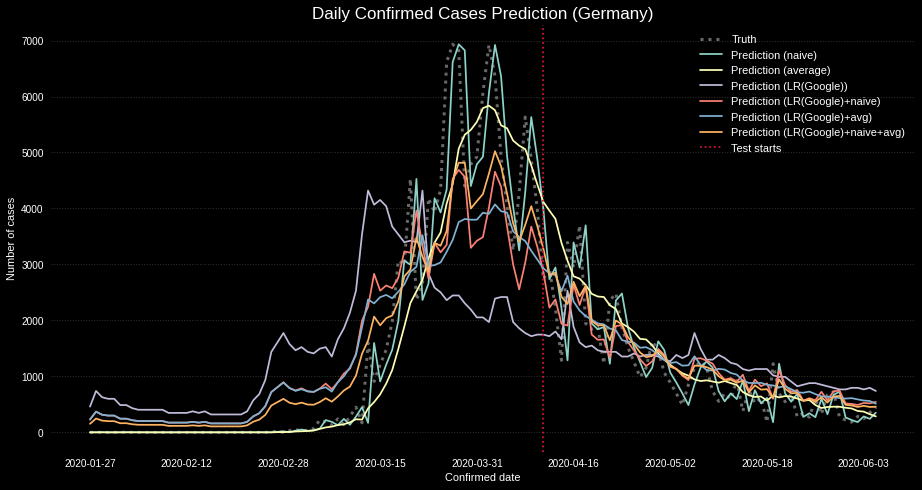

[R2 score in testing]        
Naive: 0.5735        
Average: 0.5854        
LR(Google): 0.4762        
LR(Google) + Naive: 0.7104        
LR(Google) + Average: 0.7244        
LR(Google) + Naive + Average: 0.7506


In [ ]:
## 1. Ensemble models
pred_fusion_germany = (np.array(pred_naive) + np.array(pred_all))/2
pred_fusion_germany_avg = (np.array(pred_avg) + np.array(pred_all))/2
pred_fusion_germany_all = (np.array(pred_avg) + np.array(pred_naive) + np.array(pred_all))/3

## 2. Plot predictions with all models
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Daily Confirmed Cases Prediction (Germany)', size=17)
plt.plot(daily_germany.Date, y_germany, color='dimgray'
         , ls=':'
         , lw=3)
plt.plot(daily_germany.Date, pred_naive)
plt.plot(daily_germany.Date, pred_avg)
plt.plot(daily_germany.Date, pred_all)
plt.plot(daily_germany.Date, pred_fusion_germany)
plt.plot(daily_germany.Date, pred_fusion_germany_avg)
plt.plot(daily_germany.Date, pred_fusion_germany_all)
ax.axvline(daily_germany.Date.iloc[-best_size_g], ls=':', color='crimson')
ax.set_xticks(ax.get_xticks()[::int(len(daily_germany.Date)/8)])
ax.legend(['Truth'
           , 'Prediction (naive)'
           , 'Prediction (average)'
           , 'Prediction (LR(Google))'
           , 'Prediction (LR(Google)+naive)'
           , 'Prediction (LR(Google)+avg)'
           , 'Prediction (LR(Google)+naive+avg)'
           , 'Test starts'
          ], fontsize=11)
plt.xlabel('Confirmed date')
plt.ylabel('Number of cases')
plt.show()

## 2. Check scores
print(f'[R2 score in testing]\
        \nNaive: {round( r2_score(y_germany[-best_size_g:], pred_naive[-best_size_g:]), 4 )}\
        \nAverage: {round( r2_score(y_germany[-best_size_g:], pred_avg[-best_size_g:]), 4 )}\
        \nLR(Google): {round( r2_score(y_germany[-best_size_g:], pred_all[-best_size_g:]), 4 )}\
        \nLR(Google) + Naive: {round( r2_score(y_germany[-best_size_g:], pred_fusion_germany[-best_size_g:]), 4 )}\
        \nLR(Google) + Average: {round( r2_score(y_germany[-best_size_g:], pred_fusion_germany_avg[-best_size_g:]), 4 )}\
        \nLR(Google) + Naive + Average: {round( r2_score(y_germany[-best_size_g:], pred_fusion_germany_all[-best_size_g:]), 4 )}')

## 3. Save the best prediction as a benchmark
bench_germany = pred_fusion_germany_all

Performance Analysis - daily confirmed cases prediction (Germany)



1. Naive VS. average
    1) Naive wins when there's little difference between days
    2) Averaging is more robust for the short-term shifts
        - the robustness depends on the window size of averaging (7 applied now)
    3) This shows in the case of ensembling with other models too
2. Linear regression on Google search trends works better in test than training (same as S.Korea)
    1) Only the scale is alterable while the shape is stable
    2) The degree of change is up to the choice of testset size
        - which we decided by empirical runnings with various test set sizes
        - this could make the model overfitted only to the test set we have now
    3) We need a complementary model which is insensitive to test set sizes
3. Average / naive forecasting complement the regression model as they are running dynamically
    1) Linear regression could harness all the observations in the training set
    2) Average forecasting is more dynamic than linear regression as it learns from only the recent truths
    3) Naive catches more dynamic change than average (1 observation VS. 7 observations)
    4) When combined all three actually seem working harmoniously, yielding the best performance

What about using more sophisticated forecasting methods? (on the data of S.Korea)


#2. ARIMA
ARIMA - A statistical model for time series forecasting (AutoRegressive + Integrated + Moving Average)


1. AR (autoregressive): checks and uses the dependent relationship between the truth and the lagged value of it
2. I (integrated): subtracts previous values from the truth to make the time series stationary
    - stationary means the values are random without trend, seasonal or cyclic patterns
3. MA (moving average): uses the moving average of residual errors for forecasting future values
    - similar to moving average of truth values above
    - but of residual errors than the values themselves

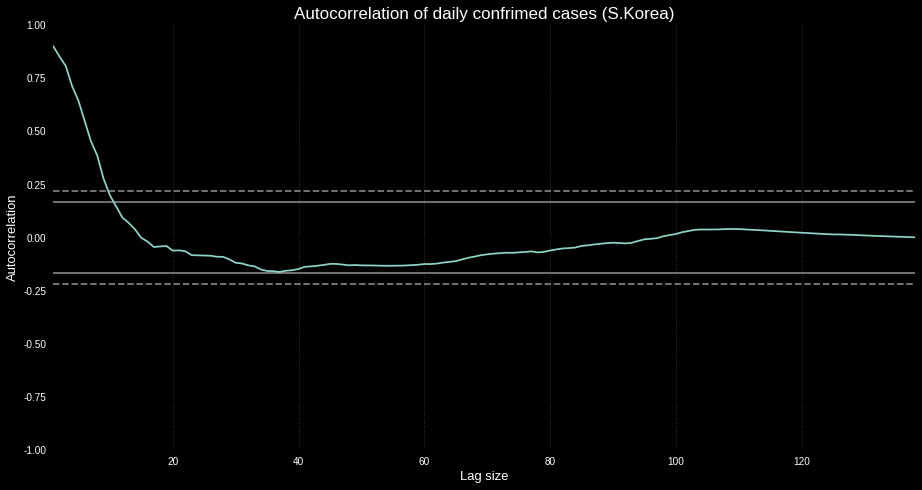

In [ ]:
acplot(daily_korea.TargetValue)
plt.title('Autocorrelation of daily confrimed cases (S.Korea)', size=17)
plt.xlabel('Lag size', size=13)
plt.ylabel('Autocorrelation', size=13)
plt.show()

Snap Analysis - autocorrelation of daily confirmed cases (S.Korea)

1. The values show significant correlations with the truth up to 10 lag
    - which means the lagged (previous) values of the truth could be useful
2. We choose 10 lag as the parameter of p(AR part) in ARIMA model
3. Lag 38 reaches the significance threshold with 99% confidence
    - but not with 95%, thus we won't use it

# ARIMA model fitted
[Parameters]
p(AR part): 10, d(I part): 1, q(MA part): 0


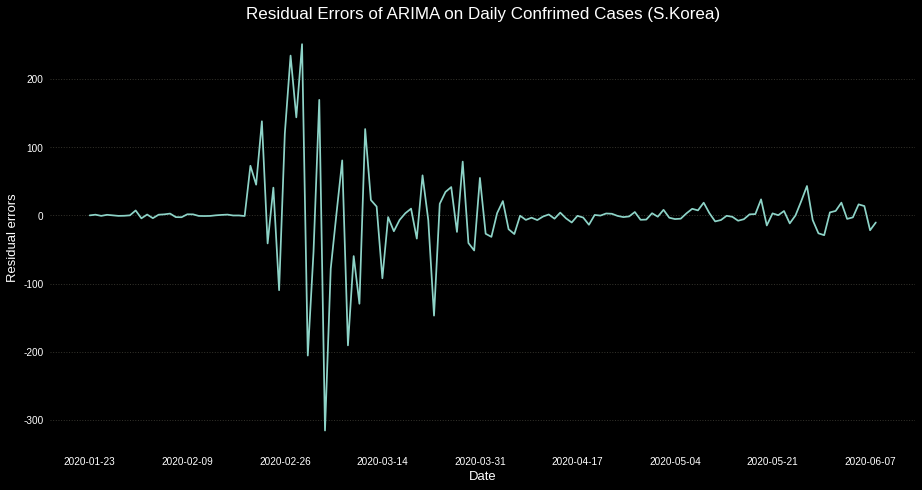

In [ ]:
## 1. Fit the model with 10 lags for AR(autoregression) and 1 window for I(difference)
p, d, q = 10, 1, 0
date_list = daily_korea.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
arima = ARIMA(daily_korea.TargetValue
              , dates= date_list
              , order=(p, d, q)
              , freq="D").fit()
print(f'# ARIMA model fitted\n[Parameters]\np(AR part): {p}, d(I part): {d}, q(MA part): {q}')

## 2. Print the result report
# print(arima.summary()) 

## 3. Check residual errors
fig, ax = plt.subplots(figsize=(13, 7))
plt.plot(daily_korea.Date, arima.resid)
plt.title('Residual Errors of ARIMA on Daily Confrimed Cases (S.Korea)', size=17)
plt.xlabel('Date', size=13)
plt.ylabel('Residual errors', size=13)
ax.set_xticks(ax.get_xticks()[::int(len(daily_korea.Date)/8)])
plt.show()

Snap Analysis - residual errors of ARIMA on daily confirmed cases

1. The errors show a random spread around the 0 horizon
2. There seems some left informations the model can use but not extracted yet
3. Especially around 2020-02-29 (near to the peak of the truth) could have them

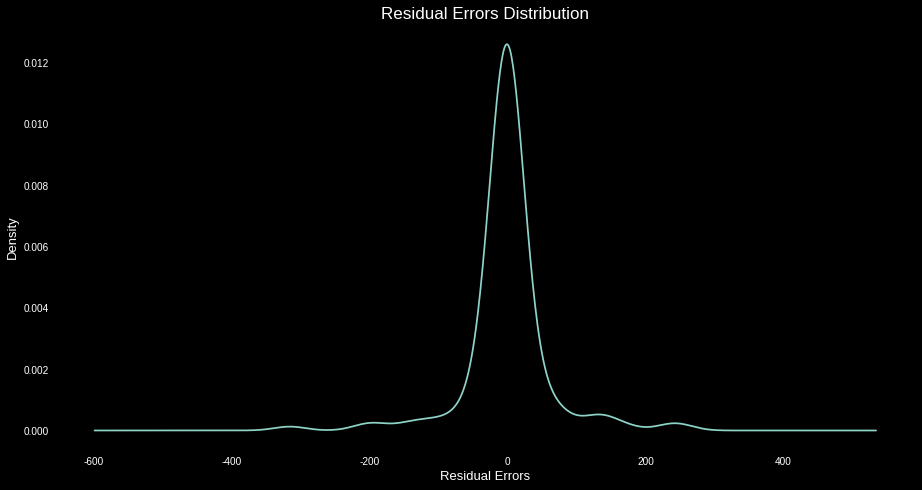

[Basic statistics]
count    138.000000
mean       0.298699
std       61.543425
min     -315.687104
25%       -6.706895
50%       -0.397813
75%        4.780716
max      251.194342
dtype: float64


In [ ]:
## 1. Check distribution of residual errors
arima.resid.plot(kind='kde'
                 , grid=False)
plt.title('Residual Errors Distribution', size=17)
plt.xlabel('Residual Errors', size=13)
plt.ylabel('Density', size=13)
plt.show()
## 2. Check statistics
print('[Basic statistics]')
print(arima.resid.describe())

Residual errors seem normally distributed, with 0 mean


Let's check the actual predictions



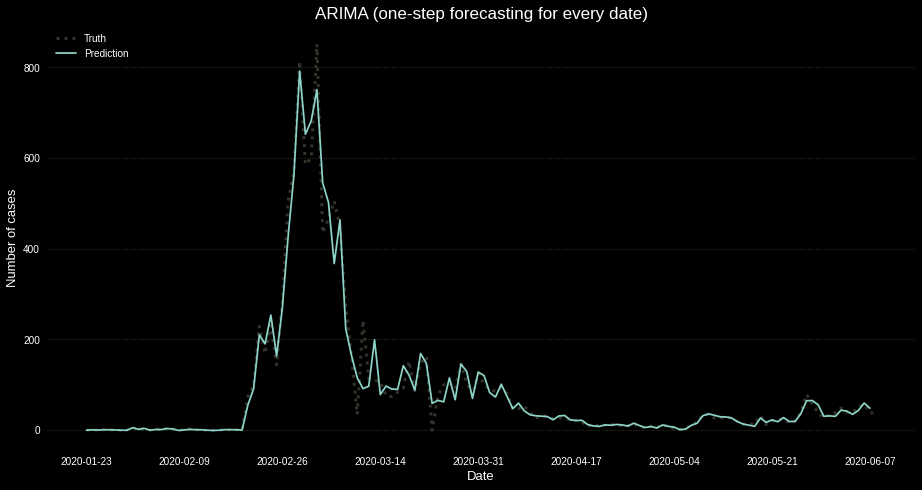

,rmse,mae,mape
score,29.207158,13.336777,0.625311


- RMSE: Root Mean Sqaure Error    
- MAE: Mean Absolute Error    
- MAPE: Mean Absolute Percentage Error      


In [ ]:
## 1. Overlap predictions(+1 step to the last observation) onto the truth
fig, ax = plt.subplots(figsize=(13, 7))

plt.plot(daily_korea.Date
         , daily_korea.TargetValue
         , color='#33322B', ls=':' , lw=3)
plt.plot(daily_korea.Date[:-1]
        , arima.predict()[1:])
plt.title('ARIMA (one-step forecasting for every date)', size=17)
plt.xlabel('Date', size=13)
plt.ylabel('Number of cases', size=13)
ax.set_xticks(ax.get_xticks()[::int(len(daily_korea.Date)/8)])
plt.legend(['Truth', 'Prediction'], loc='upper left')
plt.show()

## 2. Check scores
diff, rmse, mae, mape = diff_metrics(daily_korea.TargetValue[:-1], arima.predict()[1:])
scores = pd.DataFrame(
    {'rmse': rmse
     , 'mae': mae
     , 'mape': mape}
    , index=['score']
)
display(scores)
print('- RMSE: Root Mean Sqaure Error\
    \n- MAE: Mean Absolute Error\
    \n- MAPE: Mean Absolute Percentage Error\
      ')


Result Analysis - ARIMA (one-step forecasting for every date)

1. ARIMA model gives one-step prediction for every date
2. We apply -1 step to all predictions for overlapping them with the truth
3. The model fits the truth to some extent visually and numerically

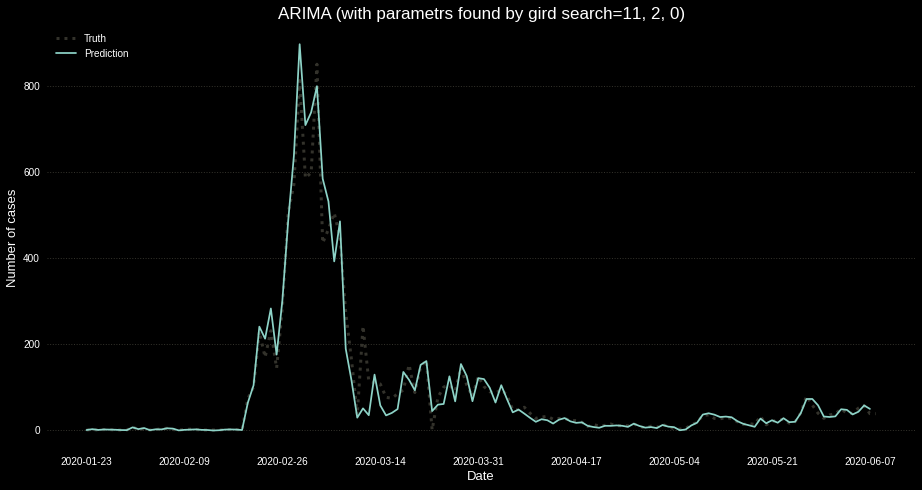

,rmse,mae,mape
score,34.954381,16.296871,0.54644


In [ ]:
## 1. Apply best parameter set
arima = ARIMA(daily_korea.TargetValue
              , dates=date_list
              , order=(11, 2, 0)
              , freq="D").fit()
arima_pred = arima.predict()

## 2. Overlap predictions(+1 step to the last observation) onto the truth
fig, ax = plt.subplots(figsize=(13, 7))

plt.plot(daily_korea.Date
         , daily_korea.TargetValue
         , color='#33322B', ls=':' , lw=3)
plt.plot(daily_korea.Date[:-1]
        , arima.predict()[1:])
plt.title('ARIMA (with parametrs found by gird search=11, 2, 0)', size=17)
plt.xlabel('Date', size=13)
plt.ylabel('Number of cases', size=13)
ax.set_xticks(ax.get_xticks()[::int(len(daily_korea.Date)/8)])
plt.legend(['Truth', 'Prediction'], loc='upper left')
plt.show()

## 3. Check scores
diff_grid, rmse_grid, mae_grid, mape_grid = diff_metrics(daily_korea.TargetValue[:-1], arima.predict()[1:])
scores = pd.DataFrame(
    {'rmse': rmse_grid
     , 'mae': mae_grid
     , 'mape': mape_grid}
    , index=['score']
)
scores

In [ ]:
# Performance gain checker
round((mape - mape_grid) / mape, 4)*100, round(mape, 4), round(mape_grid, 4)

(12.61, 0.6253, 0.5464)

Result Analysis - ARIMA (with parametrs found by gird search=11, 2, 0)

1. MAPE improved 12.61% (from 0.6253 to 0.5464)
2. Visaul fitting, RMSE, and MAE also show better results
3. But this could lead overfitting

Result Analysis - ARIMA (small-step forecasting, step size = 13)

1. MAPE gets 41.12% performance gain (from 0.5464 to 0.3217)
    - this is not only from the actual performance change
    - but also from the shorter length of testing period (13) this time
    - as we applied one step forcasting for all days (140) above
2. The actual predictions by ARIMA tend to underestimate the daily confirmed cases
3. Which shows the basic limitation and assumption of forecasting
    - the global trend the model learned must be same in the future
    - this could be overcome partly by feeding ARIMA with the lastest truth all the time (like naive forecasting)